In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment
from chromalab.spectra import Spectra, Illuminant

In [3]:
from chromalab.inks import InkLibrary

In [4]:
import numpy as np
from time import perf_counter

In [5]:
from tqdm.notebook import tqdm

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [8]:
all_inks = {}
with open(f'../data/nix/02022024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        all_inks[name] = spectra
        
with open(f'../data/nix/011624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        try:
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        except ValueError:
            continue
        all_inks[name] = spectra
        
        
with open(f'../data/nix/Inks_all.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        all_inks[name] = spectra
        
cmy_primaries_dict = {}
primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'../data/nix/PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra
                
                
all_inks["epson cyan"] = cmy_primaries_dict["100"]
all_inks["epson magenta"] = cmy_primaries_dict["010"]
all_inks["epson yellow"] = cmy_primaries_dict["001"]
paper = cmy_primaries_dict["000"]

/Users/varun/Documents/Python/ChromaLab/chromalab/spectra.py:35: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


In [9]:
all_inks = {}
with open(f'../data/nix/02022024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        all_inks[name] = spectra
        
with open(f'../data/nix/011624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        try:
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        except ValueError:
            continue

        all_inks[name] = spectra
        
        
with open(f'../data/nix/Inks_all.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        all_inks[name] = spectra
        
cmy_primaries_dict = {}
primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'../data/nix/PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra
                
                
all_inks["epson cyan"] = cmy_primaries_dict["100"]
all_inks["epson magenta"] = cmy_primaries_dict["010"]
all_inks["epson yellow"] = cmy_primaries_dict["001"]
paper = cmy_primaries_dict["000"]

## Testing Kubelka-Munk speed

In [10]:
len(all_inks)

151

In [11]:
from chromalab.inks import load_neugebauer

for key, value in all_inks.items():
    all_inks[key] = Pigment(value)

In [13]:
%timeit load_neugebauer(list(all_inks.values())[:4], paper)

5.09 ms ± 759 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


7.55

## Testing pca speed

In [231]:
trichromat = Observer.trichromat()
tetrachromat = Observer.tetrachromat()

In [13]:
d65 = Illuminant.get("D65")

In [14]:
n = load_neugebauer(list(all_inks.values())[:4], paper)

In [15]:
illuminant = d65.interpolate_values(n.wavelengths).data
tri_observe = trichromat.get_sensor_matrix(n.wavelengths)
tetra_observe = tetrachromat.get_sensor_matrix(n.wavelengths)

In [16]:
%timeit n.get_pca_size(tri_observe, illuminant)

1.34 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
n.get_pca_size(tri_observe, illuminant)

0.0060253681464107573

In [18]:
n.get_pca_size(tetra_observe, illuminant)

0.00020695499391558677

pca is lightning fast, showing that there's actually a bottleneck with kubelka-munk. Look into caching. 

## Validating PCA Approach

In [13]:
import itertools
import heapq

In [20]:
for subset in itertools.combinations(all_inks.items(), 3):
    print(subset)
    break

(('P balaton kek ', <chromalab.inks.Pigment object at 0x298907210>), ('Pp violet', <chromalab.inks.Pigment object at 0x2987e9fd0>), ('Pp cherry red', <chromalab.inks.Pigment object at 0x29880e9d0>))


In [188]:
def get_score(ink_subset, ss=0.1):
    names = [t[0] for t in ink_subset]
    n = load_neugebauer([t[1] for t in ink_subset], paper)
    return n.get_pca_size(tri_observe, illuminant), names

In [31]:
k = 50

top_k_scores = []

for subset in tqdm(itertools.combinations(all_inks.items(), 3), total=562475):
    score, names = get_score(subset)
    
    if len(top_k_scores) < k:
        heapq.heappush(top_k_scores, (score, names))
    else:
        if score > top_k_scores[0][0]:
            heapq.heapreplace(top_k_scores, (score, names))


  0%|          | 0/562475 [00:00<?, ?it/s]

In [32]:
top_k_scores

[(0.035452347022194353, ['Momo pink', 'Inkbara cyan', 'epson yellow']),
 (0.035459886512672574, ['Lamy red', 'R sublime', 'Inkbara cyan']),
 (0.035462413589773416, ['Pw denneweg groen ', 'PR Neon Yellow', 'Momo pink']),
 (0.035528966430468788, ['Lamy red', 'Pw denneweg groen ', 'I chiku Ria']),
 (0.035552885164935134, ['Lamy red', 'Pw denneweg groen ', 'epson yellow']),
 (0.035554396565163099, ['Lamy red', 'I chiku Ria', 'Inkbara cyan']),
 (0.03550088714727348,
  ['KWZ turquoise ', 'PR Neon Yellow', 'Dragon catfish N']),
 (0.035614206681862132, ['Inkbara yellow', 'Momo pink', 'Inkbara cyan']),
 (0.035826746622765873,
  ['Noodlers Firefly', 'Dragon catfish N', 'Inkbara cyan']),
 (0.035629490082348433,
  ['Lamy red', 'Pw denneweg groen ', 'Platinum Violet2']),
 (0.035600994964944621,
  ['Lamy red', 'Pw denneweg groen ', 'Inkbara danelion']),
 (0.035662467170686607,
  ['Iwi beginning of spring', 'Momo pink', 'Inkbara cyan']),
 (0.03573011259350288, ['Di citrus yellow', 'Momo pink', 'Inkba

lol im guessing everything for the top result here is completely wrong. oh well :)

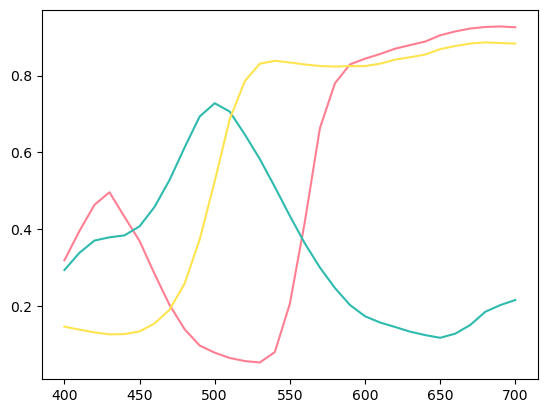

In [41]:
for k in ['Lamy red', 'Pw denneweg groen ', 'CT Pastel Yellow']:
    all_inks[k].plot()

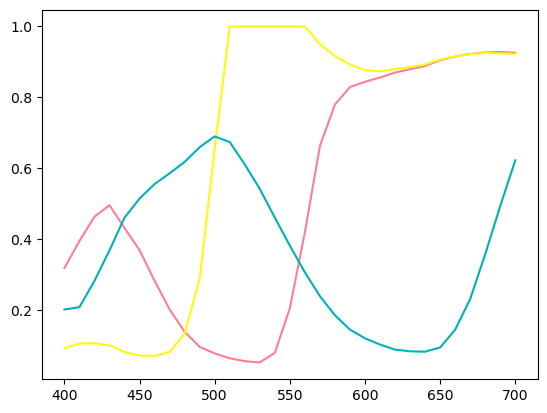

In [35]:
for k in ['Lamy red', 'Noodlers Firefly', 'Inkbara cyan']:
    all_inks[k].plot()

## Where are the bottlenecks?

The above loop is 21.3ms per iteration. Where is the bottleneck?

### Checking the loop, minheap

In [45]:
k = 50

top_k_scores = []
counter = 0

for subset in tqdm(itertools.combinations(all_inks.items(), 3), total=562475):
    score, names = counter, "lorem"
    counter += 1
    
    if len(top_k_scores) < k:
        heapq.heappush(top_k_scores, (score, names))
    else:
        if score > top_k_scores[0][0]:
            heapq.heapreplace(top_k_scores, (score, names))

  0%|          | 0/562475 [00:00<?, ?it/s]

😹 ok clearly not the loop

### checking km

In [ ]:
def get_score2(ink_subset):
    names = [t[0] for t in ink_subset]
    n = load_neugebauer([t[1] for t in ink_subset], paper)
    return 0.2, "lorem"

In [63]:
k = 50

top_k_scores = []

counter = 0
for subset in tqdm(itertools.combinations(all_inks.items(), 3), total=10000):
    load_neugebauer([t[1] for t in subset], paper)
    
    counter += 1
    if counter > 10000:
        break


  0%|          | 0/562475 [00:00<?, ?it/s]

Just load_neugebauer (e.g. kubelka munk) takes some 18ms/iteration. It's worth implementing caching. 

### checking neugebauer & pca

In [59]:
k = 50

top_k_scores = []

counter = 0
for subset in tqdm(itertools.combinations(all_inks.items(), 3), total=10000):
    n.get_pca_size(tri_observe, illuminant)
    counter += 1
    if counter > 10000:
        break

  0%|          | 0/562475 [00:00<?, ?it/s]

Taking about 15ms/iteration

hmm.. what going. on?

In [61]:
k = 50

top_k_scores = []

counter = 0
for subset in tqdm(itertools.combinations(all_inks.items(), 3), total=10000):
    score, names = get_score(subset)
    
    if len(top_k_scores) < k:
        heapq.heappush(top_k_scores, (score, names))
    else:
        if score > top_k_scores[0][0]:
            heapq.heapreplace(top_k_scores, (score, names))
    counter += 1
    if counter > 10000:
        break


  0%|          | 0/562475 [00:00<?, ?it/s]

get_score is significantly faster than get_pca_size + load_neugebauer times added together

In [64]:
k = 50

top_k_scores = []

counter = 0
for subset in tqdm(itertools.combinations(all_inks.items(), 3), total=10000):
    load_neugebauer([t[1] for t in subset], paper)
    n.get_pca_size(tri_observe, illuminant)

    counter += 1
    if counter > 10000:
        break


  0%|          | 0/10000 [00:00<?, ?it/s]

get_score is saving an indorinate amoutn of tiem for some reasn,

might be because get_score is caching global variables which is reducing acces time.
ok. good to kmow. I keepm in mnid. look up gloval variable berry expensz,

In [69]:
all_inks["Lamy blue"].data

array([ 0.37207186,  0.49639455,  0.64036065,  0.72749877,  0.77095699,
        0.79236752,  0.79188955,  0.77118957,  0.73458761,  0.68522728,
        0.62440312,  0.5428732 ,  0.45627481,  0.38492423,  0.33016401,
        0.29042822,  0.26059863,  0.24449775,  0.23423244,  0.23019238,
        0.23056112,  0.23684135,  0.24930641,  0.26623192,  0.28045246,
        0.30530405,  0.34285003,  0.39078179,  0.4419319 ,  0.47999141,
        0.50371373])

In [72]:
all_inks["Lamy blue"].data.astype(np.float16)

array([ 0.372 ,  0.4963,  0.64  ,  0.7275,  0.771 ,  0.7925,  0.792 ,
        0.771 ,  0.7344,  0.685 ,  0.6245,  0.543 ,  0.4563,  0.385 ,
        0.33  ,  0.2905,  0.2605,  0.2445,  0.2343,  0.2302,  0.2306,
        0.2368,  0.2493,  0.266 ,  0.2805,  0.3054,  0.3428,  0.3909,
        0.442 ,  0.48  ,  0.504 ], dtype=float16)

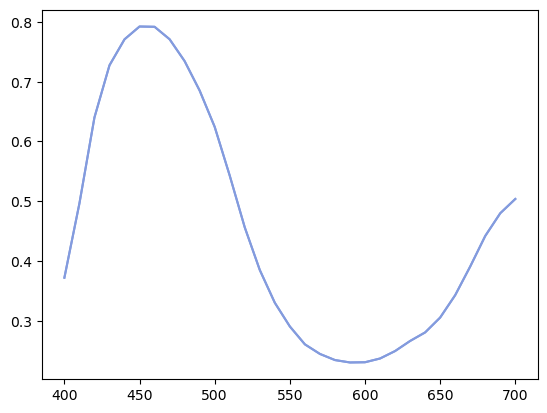

In [74]:
all_inks["Lamy blue"].plot()
Spectra(data=all_inks["Lamy blue"].data.astype(np.float16), wavelengths=wavelengths10).plot()

we should be using float 16

## cached pca search

In [14]:
all_spectras = list(all_inks.values())

In [15]:
all_data = np.array([s.data for s in all_spectras])

In [16]:
data.shape

NameError: name 'data' is not defined

In [ ]:
data[list((1,2,3))].shape

In [ ]:
data[list((1,2,3)), :].shape

In [17]:
from chromalab.inks import k_s_from_data, data_from_k_s

In [18]:
np.stack(k_s_from_data(all_inks["Lamy blue"].data)).shape

(2, 31)

In [19]:
all_spectras[:10]

In [127]:
from itertools import combinations, combinations_with_replacement

In [109]:
km_cache = {}

for i in range(2, k + 1):
    concentrations = np.ones(i) / i
    for subset in combinations(range(8), i):
        inks_to_mix = all_data[list(subset)]
        ks_batch = []
        for ink in inks_to_mix:
            ks_batch.append(np.stack(k_s_from_data(ink)))
        ks_batch = np.stack(ks_batch, axis=2)
        ks_mix = ks_batch @ concentrations
        data = data_from_k_s(ks_mix[0], ks_mix[1])
        km_cache[subset] = data.astype(np.float16)

In [138]:
for subset in combinations(range(4), 4):
    binary = [0] * 4
    for index in subset:
        binary[index] = 1
    print(binary)

[1, 1, 1, 1]


In [142]:
for inkset_idx in combinations(range(8), 4):
    primaries_array = []
    for i in range(2, 4 + 1):
        for subset in (combinations(inkset_idx, i)):
            print((subset))
            primaries_array.append(km_cache[subset])
            
    print(np.array(primaries_array).shape)
    break

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)
(0, 1, 2, 3)
(11, 31)


In [144]:
small_inks = {key : all_inks[key] for key in list(all_inks.keys())[:15]}

In [17]:
from chromalab.inks import InkLibrary

In [18]:
d65 = Illuminant.get("d65")

In [9]:
top_big_tetra = [(0.0015777456740153231, ['Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Rose cyclamen H']), (0.0015677609095995637, ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly']), (0.0015251135066498924, ['V isabela', 'Lamy red', 'Noodlers Firefly', 'Platinum violet']), (0.0015222524183002009, ['V isabela', 'Lamy crystal beryl', 'Lamy red', 'Noodlers Firefly']), (0.0015148736141626842, ['T foxglove', 'PR Neon Yellow', 'Peach haze D', 'Platinum violet']), (0.0015125470372454484, ['Lamy crystal beryl', 'Lamy red', 'T sea glass', 'Noodlers Firefly']), (0.0015089128855816799, ['T foxglove', 'Noodlers Firefly', 'Peach haze D', 'Platinum violet']), (0.0015084527300979987, ['Lamy red', 'Pw groenmarkt smaragd ', 'PR Neon Yellow', 'Rose cyclamen H']), (0.0015077419872625679, ['Lamy red', 'T sea glass', 'Noodlers Firefly', 'Platinum violet']), (0.0015062681685992013, ['Lamy red', 'T sea glass', 'Noodlers Firefly', 'Rose cyclamen H']), (0.0015040138742651483, ['V isabela', 'I tsutsuji ', 'Noodlers Firefly', 'Peach haze D']), (0.0015037360854434504, ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'PR Neon Yellow']), (0.0015000511381627502, ['V isabela', 'Lamy crystal beryl', 'Noodlers Firefly', 'Peach haze D']), (0.0014960425473549905, ['Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Platinum violet']), (0.0014943388301540636, ['V isabela', 'Lamy red', 'I tsutsuji ', 'PR Neon Yellow']), (0.0014863604377524215, ['V isabela', 'Lamy red', 'I tsutsuji ', 'Noodlers Firefly']), (0.0014837749105623269, ['V isabela', 'Lamy red', 'Noodlers Firefly', 'Rose cyclamen H']), (0.0014832619574460548, ['Lamy red', 'Pw groenmarkt smaragd ', 'CT Pastel Yellow', 'Rose cyclamen H']), (0.0014781180651640934, ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'CT Pastel Yellow']), (0.0014757819164343035, ['T milky ocean', 'Noodlers Firefly', 'Peach haze D', 'Platinum violet']), (0.0014744652879419521, ['T foxglove', 'Noodlers Firefly', 'Orange D', 'Platinum violet']), (0.0014741702754218556, ['Lamy crystal beryl', 'Lamy red', 'T sea glass', 'PR Neon Yellow']), (0.001469792373036079, ['Lamy red', 'Mg turquoise', 'Noodlers Firefly', 'Platinum violet']), (0.0014693545554390096, ['V isabela', 'Noodlers Firefly', 'Peach haze D', 'Platinum violet']), (0.0014679428060448264, ['V isabela', 'Lamy crystal beryl', 'Lamy red', 'PR Neon Yellow']), (0.0014666435574495521, ['Lamy red', 'T sea glass', 'PR Neon Yellow', 'Rose cyclamen H']), (0.0014653774143544105, ['V isabela', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D']), (0.0014618050514734436, ['Lamy red', 'Noodlers Firefly', 'Rose cyclamen H', 'Pilot blue']), (0.0014613630852899943, ['Lamy red', 'PR Neon Yellow', 'Rose cyclamen H', 'Pilot blue']), (0.0014575399456173567, ['T foxglove', 'PR Neon Yellow', 'Orange D', 'Platinum violet']), (0.0014560908264212111, ['T foxglove', 'CT Pastel Yellow', 'Peach haze D', 'Platinum violet']), (0.0014524767633349498, ['Lamy red', 'Pw groenmarkt smaragd ', 'I tsutsuji ', 'PR Neon Yellow']), (0.0014521235134207469, ['V isabela', 'Noodlers Firefly', 'Peach haze D', 'Pink gazelle']), (0.0014497962985228644, ['T foxglove', 'Noodlers Firefly', 'Platinum violet', 'Orange soleil']), (0.0014490918530094747, ['Lamy red', 'T foxglove', 'PR Neon Yellow', 'Platinum violet']), (0.0014489464276112723, ['V isabela', 'Lamy red', 'Di citrus yellow', 'Platinum violet']), (0.0014489149735065312, ['V isabela', 'Lamy red', 'O pink owl', 'Noodlers Firefly']), (0.0014487840044073795, ['Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D']), (0.0014467013816898623, ['Lamy red', 'Pw groenmarkt smaragd ', 'I tsutsuji ', 'Noodlers Firefly']), (0.0014463204338995232, ['T milky ocean', 'PR Neon Yellow', 'Peach haze D', 'Platinum violet']), (0.0014434901720335133, ['Lamy red', 'Mg turquoise', 'PR Neon Yellow', 'Platinum violet']), (0.0014423955035476202, ['T sea glass', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D']), (0.0014412695251986162, ['V isabela', 'I tsutsuji ', 'PR Neon Yellow', 'Peach haze D']), (0.0014401708209339302, ['Lamy crystal beryl', 'Lamy red', 'Noodlers Firefly', 'Pilot blue']), (0.0014379970295374316, ['Lamy crystal beryl', 'Lamy red', 'PR Neon Yellow', 'Pilot blue']), (0.0014364793051820618, ['V isabela', 'Lamy crystal beryl', 'Vd sea shell shimmer', 'Noodlers Firefly']), (0.0014352406640301422, ['V isabela', 'Lamy crystal beryl', 'Noodlers Firefly', 'Orange D']), (0.0014342139665478272, ['Lamy crystal beryl', 'T sea glass', 'Noodlers Firefly', 'Peach haze D']), (0.0014341011523513491, ['V isabela', 'Lamy crystal beryl', 'I fuyu gaki ', 'Noodlers Firefly']), (0.0014338919778499059, ['Mg turquoise', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D'])]

## analyzing selected inksets

In [19]:
set0 = ['Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Rose cyclamen H']
set1 = ['Lamy red', 'Pw groenmarkt smaragd ', 'CT Pastel Yellow', 'Rose cyclamen H']
set2 = ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'CT Pastel Yellow']
set3 = ['T foxglove', 'CT Pastel Yellow', 'Peach haze D', 'Platinum violet']
set4 = ['V isabela', 'Lamy red', 'Di citrus yellow', 'Platinum violet']


for i, s in enumerate([set1, set2, set3, set4]):
    g = InkGamut([all_inks[a] for a in s], paper, d65)
    pc, _perc = g.get_point_cloud(tetrachromat, stepsize=0.05)
    data = []
    for perc in _perc:
        d = g.neugebauer.mix(perc)
        data.append(d)
    data = np.array(data).squeeze(1)
    print(data.shape)
    np.save(f"../outputs/set{i + 1}_spectra005", data)
    np.save(f"../outputs/set{i + 1}_pointcloud005", pc)

#     w = g.get_width(tetrachromat, stepsize=0.02, verbose=False)
#     print("set", i, "\t width", w)

Generating point cloud: 2it [00:00,  4.50it/s]                                                 


(194481, 31)


Generating point cloud: 2it [00:00,  6.37it/s]                                                 


(194481, 31)


Generating point cloud: 2it [00:00,  6.75it/s]                                                 


(194481, 31)


Generating point cloud: 2it [00:00,  5.89it/s]                                                 


(194481, 31)


## making inkset smaller

In [107]:
top_big_tetra = [(0.0015777456740153231, ['Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Rose cyclamen H']), (0.0015677609095995637, ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly']), (0.0015251135066498924, ['V isabela', 'Lamy red', 'Noodlers Firefly', 'Platinum violet']), (0.0015222524183002009, ['V isabela', 'Lamy crystal beryl', 'Lamy red', 'Noodlers Firefly']), (0.0015148736141626842, ['T foxglove', 'PR Neon Yellow', 'Peach haze D', 'Platinum violet']), (0.0015125470372454484, ['Lamy crystal beryl', 'Lamy red', 'T sea glass', 'Noodlers Firefly']), (0.0015089128855816799, ['T foxglove', 'Noodlers Firefly', 'Peach haze D', 'Platinum violet']), (0.0015084527300979987, ['Lamy red', 'Pw groenmarkt smaragd ', 'PR Neon Yellow', 'Rose cyclamen H']), (0.0015077419872625679, ['Lamy red', 'T sea glass', 'Noodlers Firefly', 'Platinum violet']), (0.0015062681685992013, ['Lamy red', 'T sea glass', 'Noodlers Firefly', 'Rose cyclamen H']), (0.0015040138742651483, ['V isabela', 'I tsutsuji ', 'Noodlers Firefly', 'Peach haze D']), (0.0015037360854434504, ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'PR Neon Yellow']), (0.0015000511381627502, ['V isabela', 'Lamy crystal beryl', 'Noodlers Firefly', 'Peach haze D']), (0.0014960425473549905, ['Lamy red', 'Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Platinum violet']), (0.0014943388301540636, ['V isabela', 'Lamy red', 'I tsutsuji ', 'PR Neon Yellow']), (0.0014863604377524215, ['V isabela', 'Lamy red', 'I tsutsuji ', 'Noodlers Firefly']), (0.0014837749105623269, ['V isabela', 'Lamy red', 'Noodlers Firefly', 'Rose cyclamen H']), (0.0014832619574460548, ['Lamy red', 'Pw groenmarkt smaragd ', 'CT Pastel Yellow', 'Rose cyclamen H']), (0.0014781180651640934, ['Lamy crystal beryl', 'Lamy red', 'Pw groenmarkt smaragd ', 'CT Pastel Yellow']), (0.0014757819164343035, ['T milky ocean', 'Noodlers Firefly', 'Peach haze D', 'Platinum violet']), (0.0014744652879419521, ['T foxglove', 'Noodlers Firefly', 'Orange D', 'Platinum violet']), (0.0014741702754218556, ['Lamy crystal beryl', 'Lamy red', 'T sea glass', 'PR Neon Yellow']), (0.001469792373036079, ['Lamy red', 'Mg turquoise', 'Noodlers Firefly', 'Platinum violet']), (0.0014693545554390096, ['V isabela', 'Noodlers Firefly', 'Peach haze D', 'Platinum violet']), (0.0014679428060448264, ['V isabela', 'Lamy crystal beryl', 'Lamy red', 'PR Neon Yellow']), (0.0014666435574495521, ['Lamy red', 'T sea glass', 'PR Neon Yellow', 'Rose cyclamen H']), (0.0014653774143544105, ['V isabela', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D']), (0.0014618050514734436, ['Lamy red', 'Noodlers Firefly', 'Rose cyclamen H', 'Pilot blue']), (0.0014613630852899943, ['Lamy red', 'PR Neon Yellow', 'Rose cyclamen H', 'Pilot blue']), (0.0014575399456173567, ['T foxglove', 'PR Neon Yellow', 'Orange D', 'Platinum violet']), (0.0014560908264212111, ['T foxglove', 'CT Pastel Yellow', 'Peach haze D', 'Platinum violet']), (0.0014524767633349498, ['Lamy red', 'Pw groenmarkt smaragd ', 'I tsutsuji ', 'PR Neon Yellow']), (0.0014521235134207469, ['V isabela', 'Noodlers Firefly', 'Peach haze D', 'Pink gazelle']), (0.0014497962985228644, ['T foxglove', 'Noodlers Firefly', 'Platinum violet', 'Orange soleil']), (0.0014490918530094747, ['Lamy red', 'T foxglove', 'PR Neon Yellow', 'Platinum violet']), (0.0014489464276112723, ['V isabela', 'Lamy red', 'Di citrus yellow', 'Platinum violet']), (0.0014489149735065312, ['V isabela', 'Lamy red', 'O pink owl', 'Noodlers Firefly']), (0.0014487840044073795, ['Pw groenmarkt smaragd ', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D']), (0.0014467013816898623, ['Lamy red', 'Pw groenmarkt smaragd ', 'I tsutsuji ', 'Noodlers Firefly']), (0.0014463204338995232, ['T milky ocean', 'PR Neon Yellow', 'Peach haze D', 'Platinum violet']), (0.0014434901720335133, ['Lamy red', 'Mg turquoise', 'PR Neon Yellow', 'Platinum violet']), (0.0014423955035476202, ['T sea glass', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D']), (0.0014412695251986162, ['V isabela', 'I tsutsuji ', 'PR Neon Yellow', 'Peach haze D']), (0.0014401708209339302, ['Lamy crystal beryl', 'Lamy red', 'Noodlers Firefly', 'Pilot blue']), (0.0014379970295374316, ['Lamy crystal beryl', 'Lamy red', 'PR Neon Yellow', 'Pilot blue']), (0.0014364793051820618, ['V isabela', 'Lamy crystal beryl', 'Vd sea shell shimmer', 'Noodlers Firefly']), (0.0014352406640301422, ['V isabela', 'Lamy crystal beryl', 'Noodlers Firefly', 'Orange D']), (0.0014342139665478272, ['Lamy crystal beryl', 'T sea glass', 'Noodlers Firefly', 'Peach haze D']), (0.0014341011523513491, ['V isabela', 'Lamy crystal beryl', 'I fuyu gaki ', 'Noodlers Firefly']), (0.0014338919778499059, ['Mg turquoise', 'Noodlers Firefly', 'Rose cyclamen H', 'Peach haze D'])]

In [108]:
selected_ink_names = set()
for _, ink_names in top_big_tetra:
    for name in ink_names:
        if name == "Noodlers Firefly" or name == "PR Neon Yellow":
            continue
        selected_ink_names.add(name)

In [109]:
selected_inks = {}
for name in selected_ink_names:
    selected_inks[name] = all_inks[name]
    
selected_inks["epson cyan"] = all_inks["epson cyan"]
selected_inks["Operation overlord orange N"] = all_inks["Operation overlord orange N"]

In [110]:
len(selected_inks)

23

In [111]:
selected_library = InkLibrary(selected_inks, paper)

In [114]:
list(selected_inks.keys())

['Lamy crystal beryl',
 'Vd sea shell shimmer',
 'Peach haze D',
 'Orange soleil',
 'Pink gazelle',
 'O pink owl',
 'Pw groenmarkt smaragd ',
 'Rose cyclamen H',
 'Orange D',
 'T sea glass',
 'Lamy red',
 'Pilot blue',
 'CT Pastel Yellow',
 'Mg turquoise',
 'Platinum violet',
 'T foxglove',
 'Di citrus yellow',
 'I tsutsuji ',
 'T milky ocean',
 'V isabela',
 'I fuyu gaki ',
 'epson cyan',
 'Operation overlord orange N']

trying to beat 0.00157

precompute takes 0.003 seconds

mix takes .0487 seconds

pca iteration takes 0.226 seconds

entire loop takes 0.34 seconds

In [206]:
top100_selected = selected_library.distance_search(tetrachromat, illuminant, stepsize=0.05)

finding best inkset: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5985/5985.0 [3:01:56<00:00,  1.82s/it]


In [105]:
top100_selected = [(0.021809324137149422,
  ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.021743380157417558,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T sea glass']),
 (0.0216237397221829,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle']),
 (0.021550898726572065,
  ['Pilot blue', 'Lamy red', 'O pink owl', 'T milky ocean']),
 (0.021534635163180826,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Mg turquoise']),
 (0.021524523379702787,
  ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle']),
 (0.021448872756368309,
  ['Rose cyclamen H', 'Pilot blue', 'T sea glass', 'V isabela']),
 (0.021435248967392628,
  ['Pilot blue', 'Di citrus yellow', 'O pink owl', 'V isabela']),
 (0.021373697511416656,
  ['Pilot blue', 'I tsutsuji ', 'V isabela', 'CT Pastel Yellow']),
 (0.021368285246353258,
  ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow']),
 (0.021335642552370027,
  ['Pilot blue', 'Di citrus yellow', 'Platinum violet', 'V isabela']),
 (0.021322671348392441,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Platinum violet']),
 (0.021318235780195482,
  ['Pilot blue', 'Peach haze D', 'Mg turquoise', 'Pink gazelle']),
 (0.021254499816356853,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'O pink owl']),
 (0.021240425218774228,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'Pink gazelle']),
 (0.021230218182257454,
  ['Pilot blue', 'T sea glass', 'Lamy crystal beryl', 'V isabela']),
 (0.021227678212186685,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'Lamy crystal beryl']),
 (0.021196650060832045,
  ['Pilot blue', 'T foxglove', 'T sea glass', 'Platinum violet']),
 (0.021170667683658551,
  ['Pilot blue', 'Platinum violet', 'V isabela', 'CT Pastel Yellow']),
 (0.021161109886654261,
  ['Pilot blue', 'Lamy red', 'Mg turquoise', 'Lamy crystal beryl']),
 (0.021134343838459857,
  ['Pilot blue', 'Mg turquoise', 'V isabela', 'Pink gazelle']),
 (0.021132104345478075,
  ['Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela', 'Pink gazelle']),
 (0.021096055836887784,
  ['Pilot blue', 'Lamy red', 'I tsutsuji ', 'Mg turquoise']),
 (0.021092022925002396,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'O pink owl']),
 (0.021030492900375897,
  ['Pilot blue', 'T foxglove', 'Lamy crystal beryl', 'Pink gazelle']),
 (0.021016975381839886,
  ['Pilot blue', 'Lamy red', 'Platinum violet', 'Pw groenmarkt smaragd ']),
 (0.020995360289799037,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'V isabela']),
 (0.020994166793718516,
  ['Pilot blue', 'Lamy red', 'T foxglove', 'Platinum violet']),
 (0.020980928809262722,
  ['Lamy red', 'Platinum violet', 'V isabela', 'CT Pastel Yellow']),
 (0.020959987880760755,
  ['Pilot blue', 'Lamy red', 'O pink owl', 'Mg turquoise']),
 (0.02090493116269615,
  ['Pilot blue', 'Lamy red', 'T foxglove', 'I tsutsuji ']),
 (0.020901665682482196,
  ['Pilot blue', 'T foxglove', 'Orange D', 'Lamy crystal beryl']),
 (0.02087297423315071,
  ['Pilot blue', 'T foxglove', 'I tsutsuji ', 'Platinum violet']),
 (0.020865894027955356,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'O pink owl']),
 (0.02086348025915985,
  ['Pilot blue', 'Platinum violet', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020846562638969834,
  ['Rose cyclamen H', 'Pilot blue', 'Di citrus yellow', 'V isabela']),
 (0.020840625266137947,
  ['Pilot blue', 'Di citrus yellow', 'Lamy crystal beryl', 'V isabela']),
 (0.020832098995750059,
  ['Pilot blue', 'O pink owl', 'V isabela', 'CT Pastel Yellow']),
 (0.020824273995192544,
  ['Pilot blue', 'Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow']),
 (0.020787391128264721,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Orange D']),
 (0.020780996406263852,
  ['Pilot blue', 'Peach haze D', 'T sea glass', 'O pink owl']),
 (0.020777176647902518,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T foxglove']),
 (0.020746210222774508,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Platinum violet']),
 (0.020733413432944992,
  ['Pilot blue', 'Di citrus yellow', 'I fuyu gaki ', 'Lamy crystal beryl']),
 (0.020729305897447925,
  ['Lamy red', 'O pink owl', 'T milky ocean', 'Mg turquoise']),
 (0.020727426018447237,
  ['Pilot blue', 'I fuyu gaki ', 'Mg turquoise', 'Pink gazelle']),
 (0.020719652539700595,
  ['Pilot blue', 'T sea glass', 'I fuyu gaki ', 'Lamy crystal beryl']),
 (0.02071618899388139,
  ['Rose cyclamen H',
   'Lamy red',
   'Pw groenmarkt smaragd ',
   'CT Pastel Yellow']),
 (0.020715323918165995,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'Pink gazelle']),
 (0.020705230964076338,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'Lamy crystal beryl']),
 (0.020688957491244664,
  ['Pilot blue', 'Pw groenmarkt smaragd ', 'Lamy crystal beryl', 'V isabela']),
 (0.020683121850218256,
  ['Pilot blue', 'T sea glass', 'I tsutsuji ', 'V isabela']),
 (0.020674772616639414,
  ['Pilot blue', 'Lamy red', 'Lamy crystal beryl', 'CT Pastel Yellow']),
 (0.020666495952353203,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Lamy crystal beryl']),
 (0.020652410066382021,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'I tsutsuji ']),
 (0.020632317477108919,
  ['Pilot blue', 'T foxglove', 'Lamy crystal beryl', 'V isabela']),
 (0.020612972440985811,
  ['Pilot blue', 'Di citrus yellow', 'V isabela', 'Pink gazelle']),
 (0.020612829314482717,
  ['T sea glass', 'Platinum violet', 'T milky ocean', 'V isabela']),
 (0.020609685034291669,
  ['Rose cyclamen H', 'Pilot blue', 'T sea glass', 'I fuyu gaki ']),
 (0.020609426719735924,
  ['Pilot blue', 'T foxglove', 'I fuyu gaki ', 'Pink gazelle']),
 (0.020605983364974434,
  ['Pilot blue', 'T foxglove', 'I tsutsuji ', 'Lamy crystal beryl']),
 (0.020605083316631578,
  ['Pilot blue', 'T sea glass', 'Platinum violet', 'I fuyu gaki ']),
 (0.020599565375137463,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'I fuyu gaki ']),
 (0.020595287028425224,
  ['Pilot blue', 'Lamy red', 'Mg turquoise', 'Pink gazelle']),
 (0.020591946553655593,
  ['Pilot blue', 'O pink owl', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020589749125324741,
  ['Pilot blue', 'Lamy red', 'T milky ocean', 'Lamy crystal beryl']),
 (0.020583326493296583,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pw groenmarkt smaragd ']),
 (0.020573385327981697,
  ['Pilot blue', 'V isabela', 'Pink gazelle', 'CT Pastel Yellow']),
 (0.020571982233376862,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'Platinum violet']),
 (0.020570418636224497,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Peach haze D']),
 (0.020569027288918074,
  ['Pilot blue', 'I tsutsuji ', 'I fuyu gaki ', 'CT Pastel Yellow']),
 (0.020539922872247873,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'I fuyu gaki ']),
 (0.020531564006184777,
  ['Pilot blue', 'Lamy red', 'Platinum violet', 'CT Pastel Yellow']),
 (0.02050485306280081,
  ['Pilot blue', 'Di citrus yellow', 'I tsutsuji ', 'V isabela']),
 (0.020494469797185944,
  ['Lamy red', 'T foxglove', 'Platinum violet', 'T milky ocean']),
 (0.020474731316385442,
  ['Pilot blue', 'I tsutsuji ', 'Mg turquoise', 'V isabela']),
 (0.020474722125517264,
  ['Pilot blue', 'T sea glass', 'V isabela', 'Pink gazelle']),
 (0.02047314246452403,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Mg turquoise']),
 (0.020470848320320978,
  ['Pilot blue', 'T foxglove', 'Pw groenmarkt smaragd ', 'Pink gazelle']),
 (0.020468447400479262,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'V isabela']),
 (0.020461180665355405,
  ['Pilot blue', 'Lamy red', 'I tsutsuji ', 'T milky ocean']),
 (0.020457782928136825,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'Pw groenmarkt smaragd ']),
 (0.020455419796209795,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'T milky ocean']),
 (0.020454504969576626,
  ['Pilot blue', 'I fuyu gaki ', 'O pink owl', 'Mg turquoise']),
 (0.020450510076137629,
  ['Pilot blue', 'T foxglove', 'Orange D', 'O pink owl']),
 (0.020446199394529463,
  ['Pilot blue', 'T foxglove', 'V isabela', 'Pink gazelle']),
 (0.020445760079197572,
  ['Pilot blue', 'T foxglove', 'Orange soleil', 'Platinum violet']),
 (0.020437988969111753,
  ['Pilot blue', 'T foxglove', 'T milky ocean', 'Lamy crystal beryl']),
 (0.020436157613282713,
  ['Pilot blue', 'I tsutsuji ', 'Orange D', 'Mg turquoise']),
 (0.020421784952309896,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Pink gazelle']),
 (0.020417862028889733,
  ['Rose cyclamen H', 'Pilot blue', 'Peach haze D', 'Mg turquoise']),
 (0.020414865795451265,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'CT Pastel Yellow']),
 (0.020414182537293102,
  ['Pilot blue', 'Vd sea shell shimmer', 'T sea glass', 'Lamy crystal beryl']),
 (0.020407543501296477,
  ['Pilot blue', 'Orange soleil', 'I tsutsuji ', 'V isabela']),
 (0.020398939063492716,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Pw groenmarkt smaragd ']),
 (0.020398780495902658,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T milky ocean']),
 (0.020391478461657231,
  ['Rose cyclamen H', 'Pilot blue', 'I fuyu gaki ', 'Mg turquoise']),
 (0.020389990943035174,
  ['T sea glass', 'Mg turquoise', 'Pink gazelle', 'CT Pastel Yellow']),
 (0.020385868669186569,
  ['Pilot blue',
   'Di citrus yellow',
   'I fuyu gaki ',
   'Pw groenmarkt smaragd ']),
 (0.020379615945487428,
  ['T foxglove', 'Orange soleil', 'Platinum violet', 'CT Pastel Yellow'])]

In [236]:
selected_library2 = InkLibrary(selected_inks, paper)

In [241]:
top100_selected01 = selected_library2.distance_search(tetrachromat, illuminant, stepsize=0.1)

<class 'numpy.ndarray'>


finding best inkset: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8855/8855.0 [36:51<00:00,  4.00it/s]


In [255]:
top_scores = []
for i in tqdm(range(len(top100_selected01))):
    inkset = top100_selected01[i][1]
    spectras = [all_inks[ink] for ink in inkset]

    gamut = InkGamut(spectras, paper, illuminant)
    score = gamut.get_width(tetrachromat, stepsize=0.05, verbose=False)
    top_scores.append((score, inkset))
            
sorted(top_scores, reverse=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[(0.021930664124921673,
  ['Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow', 'epson cyan']),
 (0.021907869090122933,
  ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.021686854047090032,
  ['Lamy red', 'O pink owl', 'Mg turquoise', 'epson cyan']),
 (0.021653619388657896,
  ['Rose cyclamen H', 'Lamy red', 'T sea glass', 'epson cyan']),
 (0.021490191630805122,
  ['Di citrus yellow', 'Platinum violet', 'V isabela', 'epson cyan']),
 (0.021451211905082868,
  ['Lamy red', 'I tsutsuji ', 'Mg turquoise', 'epson cyan']),
 (0.021413532742462604,
  ['Pilot blue', 'V isabela', 'Pink gazelle', 'epson cyan']),
 (0.021406813633000954,
  ['Lamy red', 'T sea glass', 'Lamy crystal beryl', 'epson cyan']),
 (0.021302687906448958,
  ['Pilot blue', 'Peach haze D', 'Mg turquoise', 'Pink gazelle']),
 (0.021287078313349417,
  ['Lamy red', 'T sea glass', 'O pink owl', 'epson cyan']),
 (0.021285127107758706,
  ['Pilot blue', 'T sea glass', 'Lamy crystal beryl', 'V isabela']),


In [22]:
top_scores = [(0.021930664124921673,
  ['Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow', 'epson cyan']),
 (0.021907869090122933,
  ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.021686854047090032,
  ['Lamy red', 'O pink owl', 'Mg turquoise', 'epson cyan']),
 (0.021653619388657896,
  ['Rose cyclamen H', 'Lamy red', 'T sea glass', 'epson cyan']),
 (0.021490191630805122,
  ['Di citrus yellow', 'Platinum violet', 'V isabela', 'epson cyan']),
 (0.021451211905082868,
  ['Lamy red', 'I tsutsuji ', 'Mg turquoise', 'epson cyan']),
 (0.021413532742462604,
  ['Pilot blue', 'V isabela', 'Pink gazelle', 'epson cyan']),
 (0.021406813633000954,
  ['Lamy red', 'T sea glass', 'Lamy crystal beryl', 'epson cyan']),
 (0.021302687906448958,
  ['Pilot blue', 'Peach haze D', 'Mg turquoise', 'Pink gazelle']),
 (0.021287078313349417,
  ['Lamy red', 'T sea glass', 'O pink owl', 'epson cyan']),
 (0.021285127107758706,
  ['Pilot blue', 'T sea glass', 'Lamy crystal beryl', 'V isabela']),
 (0.021200744410505179,
  ['Pilot blue', 'Mg turquoise', 'V isabela', 'Pink gazelle']),
 (0.021178251412265703,
  ['Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela', 'Pink gazelle']),
 (0.021028128334756258,
  ['Rose cyclamen H', 'T foxglove', 'O pink owl', 'epson cyan']),
 (0.020997901115627271,
  ['Pilot blue', 'Lamy red', 'Platinum violet', 'Pw groenmarkt smaragd ']),
 (0.020953083912471138,
  ['Pilot blue', 'T foxglove', 'I tsutsuji ', 'Platinum violet']),
 (0.020952376557742181,
  ['Platinum violet',
   'V isabela',
   'epson cyan',
   'Operation overlord orange N']),
 (0.020920772989596825,
  ['Pilot blue', 'Platinum violet', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020915316487973235,
  ['Pilot blue', 'Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow']),
 (0.020908003682683696,
  ['Pilot blue', 'Lamy red', 'O pink owl', 'Mg turquoise']),
 (0.020866924851035584,
  ['I tsutsuji ',
   'Pw groenmarkt smaragd ',
   'epson cyan',
   'Operation overlord orange N']),
 (0.020863125769460034,
  ['Lamy red', 'I tsutsuji ', 'T milky ocean', 'epson cyan']),
 (0.020843600206767399,
  ['T foxglove', 'Peach haze D', 'Pink gazelle', 'epson cyan']),
 (0.020843234234472985,
  ['Peach haze D',
   'Pw groenmarkt smaragd ',
   'epson cyan',
   'Operation overlord orange N']),
 (0.02082750338419237,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Platinum violet']),
 (0.020825958403567713,
  ['T sea glass', 'Lamy crystal beryl', 'V isabela', 'epson cyan']),
 (0.020806273655885887,
  ['Pilot blue', 'O pink owl', 'V isabela', 'CT Pastel Yellow']),
 (0.020788953781872677,
  ['Lamy red', 'Mg turquoise', 'Pink gazelle', 'epson cyan']),
 (0.020788908907123926,
  ['Peach haze D', 'Orange soleil', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.02078592943067914,
  ['Pilot blue', 'Pw groenmarkt smaragd ', 'Lamy crystal beryl', 'V isabela']),
 (0.020764793501101553,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'epson cyan']),
 (0.020755175167786744,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Lamy crystal beryl']),
 (0.020744661522718255,
  ['Pilot blue',
   'Vd sea shell shimmer',
   'Pw groenmarkt smaragd ',
   'Operation overlord orange N']),
 (0.020743669033593093,
  ['Pilot blue', 'T sea glass', 'I tsutsuji ', 'V isabela']),
 (0.020743156242454541,
  ['O pink owl', 'V isabela', 'epson cyan', 'Operation overlord orange N']),
 (0.02073649041865655,
  ['Lamy red',
   'Pw groenmarkt smaragd ',
   'epson cyan',
   'Operation overlord orange N']),
 (0.020729333162035013,
  ['Rose cyclamen H', 'T sea glass', 'V isabela', 'epson cyan']),
 (0.020638408310951928,
  ['T foxglove', 'O pink owl', 'Pink gazelle', 'epson cyan']),
 (0.020634668855139593,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'I fuyu gaki ']),
 (0.020630981907617862,
  ['Mg turquoise', 'V isabela', 'Pink gazelle', 'epson cyan']),
 (0.020614985492052873,
  ['Rose cyclamen H', 'Lamy red', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.020604403030221874,
  ['Pilot blue', 'Lamy red', 'Mg turquoise', 'Pink gazelle']),
 (0.020589278290944257,
  ['Rose cyclamen H', 'Lamy red', 'Mg turquoise', 'epson cyan']),
 (0.020570418914900079,
  ['T foxglove', 'I fuyu gaki ', 'O pink owl', 'epson cyan']),
 (0.020533785353246292,
  ['Pilot blue', 'O pink owl', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020528320906148534,
  ['Pilot blue', 'T foxglove', 'Lamy crystal beryl', 'epson cyan']),
 (0.020525925095205344,
  ['T sea glass', 'V isabela', 'Pink gazelle', 'epson cyan']),
 (0.020506095713025418,
  ['Lamy red', 'T foxglove', 'I tsutsuji ', 'epson cyan']),
 (0.020493103860537709,
  ['Vd sea shell shimmer', 'T foxglove', 'I tsutsuji ', 'epson cyan']),
 (0.020476344926730727,
  ['Orange soleil', 'I fuyu gaki ', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.020467277315530774,
  ['Rose cyclamen H', 'T foxglove', 'Lamy crystal beryl', 'epson cyan']),
 (0.020466612023290531,
  ['O pink owl', 'Pw groenmarkt smaragd ', 'V isabela', 'epson cyan']),
 (0.020465870087575277,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Pw groenmarkt smaragd ']),
 (0.020464159375709057,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'T milky ocean']),
 (0.020461440174862622,
  ['Pilot blue',
   'T sea glass',
   'Orange soleil',
   'Operation overlord orange N']),
 (0.020443330649770497,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'V isabela']),
 (0.02044285416699082,
  ['Orange soleil', 'Orange D', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.020439007263357067,
  ['Pilot blue', 'I tsutsuji ', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020438165163873145,
  ['Pw groenmarkt smaragd ',
   'Lamy crystal beryl',
   'epson cyan',
   'Operation overlord orange N']),
 (0.020412006166196206,
  ['Lamy red', 'Orange soleil', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.020409725342274365,
  ['T foxglove', 'Orange D', 'Platinum violet', 'epson cyan']),
 (0.020392143611461577,
  ['Pilot blue', 'Orange soleil', 'I tsutsuji ', 'V isabela']),
 (0.020379838780461512,
  ['T foxglove', 'O pink owl', 'Lamy crystal beryl', 'epson cyan']),
 (0.020325009489131296,
  ['Pilot blue', 'T sea glass', 'O pink owl', 'V isabela']),
 (0.020324314177269764,
  ['T milky ocean', 'V isabela', 'Pink gazelle', 'epson cyan']),
 (0.020317598757450317,
  ['I fuyu gaki ', 'Pw groenmarkt smaragd ', 'Pink gazelle', 'epson cyan']),
 (0.020264707925992165,
  ['Pilot blue', 'I tsutsuji ', 'I fuyu gaki ', 'Mg turquoise']),
 (0.020179921922697019,
  ['Pilot blue', 'Lamy red', 'O pink owl', 'Pw groenmarkt smaragd ']),
 (0.020170065551426197,
  ['Platinum violet', 'V isabela', 'Pink gazelle', 'epson cyan']),
 (0.020166890907801827,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'T sea glass']),
 (0.020158718243802387,
  ['Vd sea shell shimmer', 'Di citrus yellow', 'Pink gazelle', 'epson cyan']),
 (0.020151204421772373,
  ['Pilot blue', 'Peach haze D', 'T sea glass', 'Lamy crystal beryl']),
 (0.020141255761841281,
  ['Pilot blue', 'Platinum violet', 'V isabela', 'epson cyan']),
 (0.020124682105319258,
  ['Rose cyclamen H', 'Pw groenmarkt smaragd ', 'V isabela', 'epson cyan']),
 (0.020101428144618849,
  ['Pilot blue', 'Vd sea shell shimmer', 'T foxglove', 'O pink owl']),
 (0.020087149163428075,
  ['Peach haze D', 'Mg turquoise', 'Pink gazelle', 'epson cyan']),
 (0.020070719299962125,
  ['I fuyu gaki ',
   'Pw groenmarkt smaragd ',
   'Mg turquoise',
   'Lamy crystal beryl']),
 (0.0200673571384547,
  ['T foxglove', 'T sea glass', 'Pink gazelle', 'epson cyan']),
 (0.020027812635706799,
  ['Pilot blue',
   'Di citrus yellow',
   'Peach haze D',
   'Pw groenmarkt smaragd ']),
 (0.020013186869587973,
  ['Pilot blue',
   'Pw groenmarkt smaragd ',
   'V isabela',
   'Operation overlord orange N']),
 (0.0200116777038295,
  ['Pilot blue', 'Peach haze D', 'Mg turquoise', 'epson cyan']),
 (0.019984281353196798,
  ['Rose cyclamen H', 'I fuyu gaki ', 'T milky ocean', 'epson cyan']),
 (0.019971486859921894,
  ['T sea glass', 'Orange D', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.019969526990534781,
  ['Pilot blue', 'Lamy red', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.019956413160118647,
  ['Vd sea shell shimmer', 'Mg turquoise', 'Pink gazelle', 'epson cyan']),
 (0.019889417020270084,
  ['Rose cyclamen H', 'T sea glass', 'Pw groenmarkt smaragd ', 'epson cyan']),
 (0.019833064826917046,
  ['Pilot blue', 'T milky ocean', 'Pw groenmarkt smaragd ', 'Pink gazelle']),
 (0.019832864420002705,
  ['Pilot blue',
   'Vd sea shell shimmer',
   'Pw groenmarkt smaragd ',
   'V isabela']),
 (0.019816945700609934,
  ['Pilot blue', 'T milky ocean', 'Lamy crystal beryl', 'V isabela']),
 (0.019790372077305662,
  ['Pw groenmarkt smaragd ',
   'Mg turquoise',
   'Lamy crystal beryl',
   'V isabela']),
 (0.019729777294152706,
  ['Peach haze D', 'T sea glass', 'I fuyu gaki ', 'epson cyan']),
 (0.019714556238697944,
  ['Rose cyclamen H', 'Vd sea shell shimmer', 'V isabela', 'epson cyan']),
 (0.019710849413765774,
  ['Pilot blue', 'T sea glass', 'T milky ocean', 'Lamy crystal beryl']),
 (0.019707809867367476,
  ['Pilot blue', 'Di citrus yellow', 'Orange soleil', 'epson cyan']),
 (0.019701058204064592,
  ['Rose cyclamen H', 'Pilot blue', 'I tsutsuji ', 'T milky ocean']),
 (0.019651457039704778,
  ['Rose cyclamen H', 'T sea glass', 'O pink owl', 'Mg turquoise']),
 (0.019646768361120837,
  ['Pilot blue',
   'T sea glass',
   'Pink gazelle',
   'Operation overlord orange N']),
 (0.019637470362838971,
  ['Pilot blue', 'Orange D', 'T milky ocean', 'V isabela']),
 (0.019600574024340789,
  ['Pilot blue', 'Orange D', 'Mg turquoise', 'V isabela']),
 (0.019524968790168962,
  ['Pilot blue', 'T sea glass', 'V isabela', 'Operation overlord orange N'])]

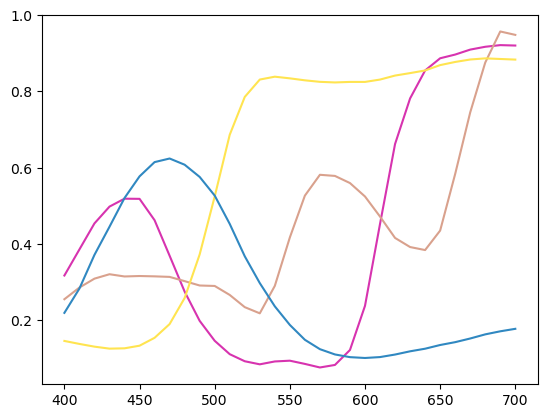

In [259]:
for kiansnf in['Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow', 'epson cyan']:
    all_inks[kiansnf].plot()

In [15]:
from chromalab.inks import km_mix

In [17]:
tetrachromat = Observer.tetrachromat()

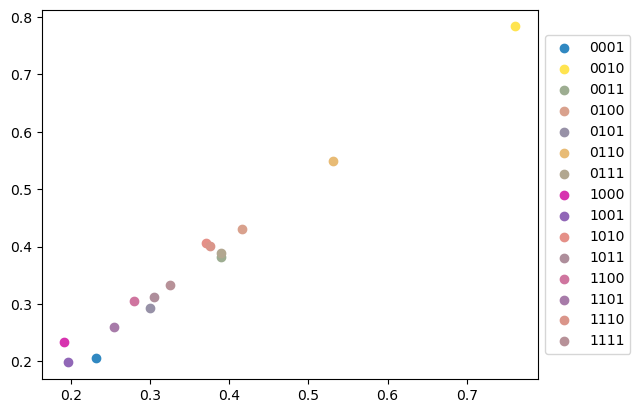

In [51]:

def plot_crosssection(ink_names):
    inks = [all_inks[n] for n in ink_names]
    num_inks = len(inks)
    primaries_dict ={}

    for i in range(1, 2 ** num_inks):
        binary_str = format(i, f'0{num_inks}b')
        inks_to_mix = []

        for j, bit in enumerate(binary_str):
            if bit == '1':
                inks_to_mix.append(inks[j])

        mixed_ink = inks_to_mix[0]

        if len(inks_to_mix) > 1:
            mixed_ink = km_mix(inks_to_mix)
        primaries_dict[binary_str] = mixed_ink
        
    for code, spectra in primaries_dict.items():
        s, m, q, l = tetrachromat.observe(spectra)
#         x = q / m
#         y = q / l
        x = q
        y = l 

        plt.scatter(x, y, label=code, color=spectra.to_rgb())
        
    return primaries_dict
    
    
    
dct = plot_crosssection(['Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow', 'epson cyan'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

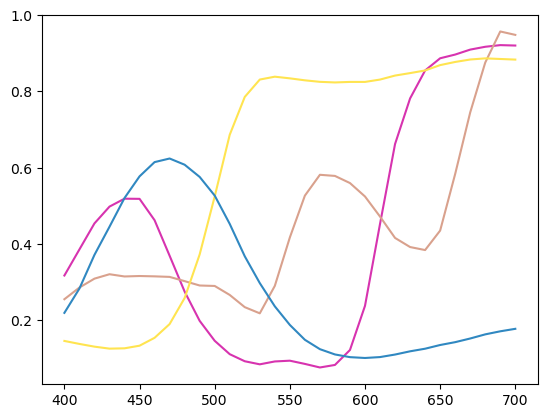

In [46]:
for n in ['Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow', 'epson cyan']:
    all_inks[n].plot()

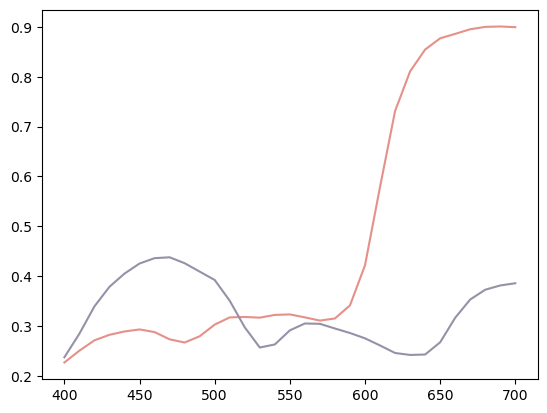

In [53]:
dct["1010"].plot()
dct["0101"].plot()

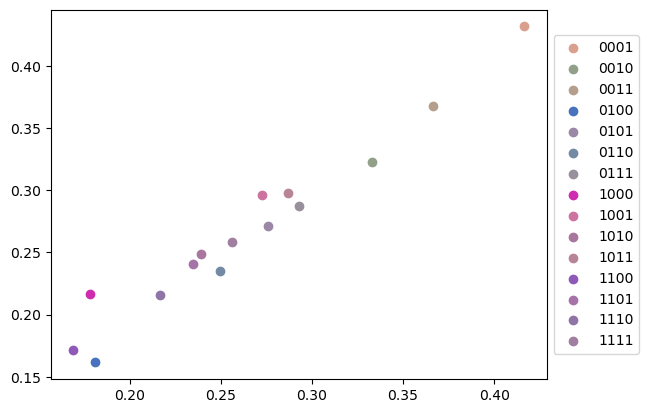

In [34]:
plot_crosssection(['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

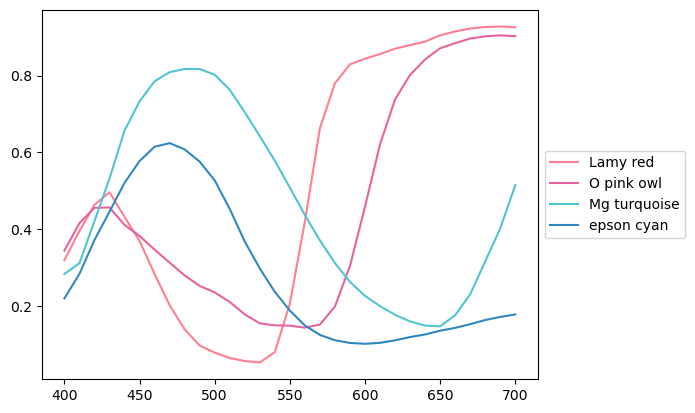

In [44]:
for n in ['Lamy red', 'O pink owl', 'Mg turquoise', 'epson cyan']:
    all_inks[n].plot(name=n, color=all_inks[n].to_rgb())
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


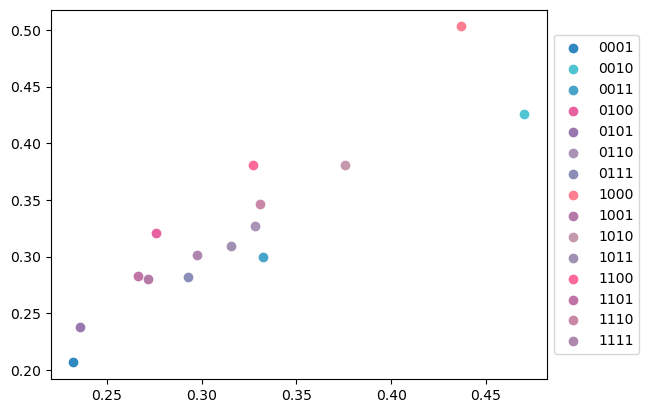

In [48]:
dct = plot_crosssection( ['Lamy red', 'O pink owl', 'Mg turquoise', 'epson cyan'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


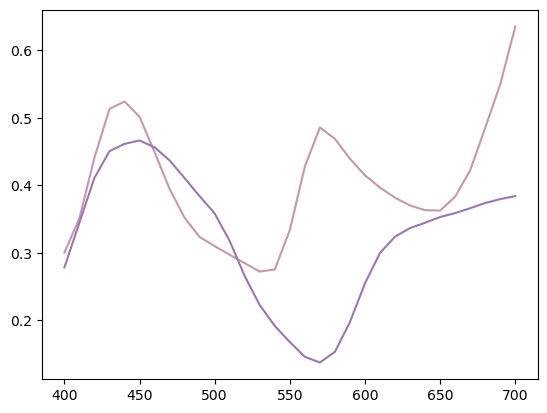

In [50]:
dct["1010"].plot()
dct["0101"].plot()

## 6 ink library

In [14]:
tetrachromat = Observer.tetrachromat()

In [15]:
best6 = selected_library.cached_pca_search(tetrachromat, illuminant=Illuminant.get("d65"), k=6)

NameError: name 'selected_library' is not defined

## comparison to ideal

find top 2-3 closest to ideal CPVY

add in spot colors

wavele

In [11]:
wavelengths0 = np.arange(0, 800, 1)

cutpoints at 493, 551, 603nm

In [12]:
ideal_cyan = np.zeros_like(wavelengths0)
ideal_cyan[:603] = 1
ideal_cyan = Spectra(wavelengths=wavelengths0, data=ideal_cyan)
ideal_cyan = ideal_cyan.interpolate_values(wavelengths1)

In [13]:
ideal_violet = np.ones_like(wavelengths0)
ideal_violet[551:603] = 0
ideal_violet = Spectra(wavelengths=wavelengths0, data=ideal_violet)
ideal_violet = ideal_violet.interpolate_values(wavelengths1)

In [14]:
ideal_pink = np.ones_like(wavelengths0)
ideal_pink[493:551] = 0
ideal_pink = Spectra(wavelengths=wavelengths0, data=ideal_pink)
ideal_pink = ideal_pink.interpolate_values(wavelengths1)

In [15]:
ideal_yellow = np.zeros_like(wavelengths0)
ideal_yellow[493:] = 1
ideal_yellow = Spectra(wavelengths=wavelengths0, data=ideal_yellow)
ideal_yellow = ideal_yellow.interpolate_values(wavelengths1)

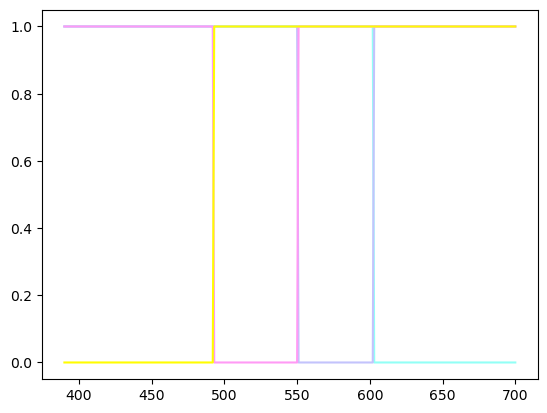

In [16]:
ideal_cyan.plot()
ideal_violet.plot()
ideal_pink.plot()
ideal_yellow.plot()

In [16]:
wavelengths10

array([400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700])

In [65]:
def l2(data1, data2):
    return np.sum(np.square(data1 - data2))

In [100]:
def derivative_l2_norm(data1, data2):
    derivative_data1 = np.diff(data1, n=1)
    derivative_data2 = np.diff(data2, n=1)

    diff = derivative_data1 - derivative_data2
    norm = np.sqrt(np.sum(np.square(diff)))
    
    return norm

In [77]:
def cosine(data1, data2):
    dot_product = np.dot(data1, data2)
    norm_data1 = np.linalg.norm(data1)
    norm_data2 = np.linalg.norm(data2)
    return 1-  dot_product / (norm_data1 * norm_data2)

In [ ]:
def genius(target_data, sample_data):
    np.dot(darget_data, sample_data) 

In [78]:
def find_closest(target, metric=l2):
    results = []
    for name, ink in all_inks.items():
        data1 = (~ink).interpolate_values(wavelengths1).data
        data2 = target.data
        score = metric(data1, data2)
        results.append((score, name))
    return sorted(results)

### best cyan

In [79]:
find_closest(ideal_cyan)

[(35.724579512371058, 'Colorberse 7 clear cyan'),
 (44.426063987987021, 'Mg turquoise'),
 (47.01711557720472, 'Pw denneweg groen '),
 (47.723268019169637, 'Pw groenmarkt smaragd '),
 (53.091251776612516, 'I syo ro '),
 (55.51914050865534, 'R torquay'),
 (56.054031886118075, 'Vd parrot fish'),
 (56.949723897326187, 'Pw laan van niew oost indigo'),
 (57.084157831133368, 'Robert Oster Australian Opal Blue'),
 (57.953223802948223, 'Wearingeul Alice'),
 (58.747901734054381, 'O crystal blue'),
 (59.952584416777057, 'FWP Three Steamboats'),
 (60.25009629545761, 'Bleu pervenche h'),
 (61.310474001169609, 'T copper patina'),
 (61.82249716141132, 'Lamy blue'),
 (62.393301666927172, 'epson cyan'),
 (62.883285951289579, 'Inkbara cyan'),
 (64.98075700264539, 'C photon'),
 (65.345097499536891, 'Mv Caribbean '),
 (65.875293017550774, 'T milky ocean'),
 (66.939686244822909, 'O puppy pods'),
 (67.418581896117558, 'Pilot blue'),
 (67.934686659893885, 'H Bleu Azur'),
 (71.136112597292239, 'V perya '),
 (

In [80]:
find_closest(ideal_cyan, metric=cosine)

[(0.081619830389150438, 'Pw denneweg groen '),
 (0.085870337245710138, 'Colorberse 7 clear cyan'),
 (0.097949741908228027, 'I syo ro '),
 (0.098612134669266327, 'Mg turquoise'),
 (0.11696034392281762, 'Pw groenmarkt smaragd '),
 (0.13420258068092838, 'epson cyan'),
 (0.13541887175630452, 'R torquay'),
 (0.14034915130439629, 'Pilot blue'),
 (0.1405748035827743, 'Vd parrot fish'),
 (0.14124370020220856, 'Wearingeul Alice'),
 (0.14171680900048189, 'Bleu pervenche h'),
 (0.14313356835391511, 'Pw laan van niew oost indigo'),
 (0.14345112272131855, 'Robert Oster Australian Opal Blue'),
 (0.14666656701045422, 'O crystal blue'),
 (0.14885808462232197, 'Inkbara cyan'),
 (0.15003971653541648, 'Mv Caribbean '),
 (0.15206271724188225, 'Lamy blue'),
 (0.15232869233236512, 'FWP Three Steamboats'),
 (0.15481364581438339, 'T copper patina'),
 (0.15825876778206882, 'C photon'),
 (0.16021200580386985, 'H Bleu Azur'),
 (0.16573810604546113, 'Iwi frost descent'),
 (0.16654692014979444, 'Mg sapphire'),
 (0

In [101]:
find_closest(ideal_cyan, metric=derivative_l2_norm)

[(0.99838610437414055, 'Pw groenmarkt smaragd '),
 (1.0000921465917676, 'FWP adventurine '),
 (1.0003106821419181, 'P zuzmo lichen'),
 (1.0003258408568696, 'Wearingeul Alice'),
 (1.0003516156525043, 'Pw hals oud bruin'),
 (1.0004962998893723, 'H Bleu Azur'),
 (1.0006383997650057, 'V perya '),
 (1.000782452340002, 'V sirena '),
 (1.001190511671864, 'V isabela'),
 (1.0012162487795202, 'FWP madame mulberry'),
 (1.0013440653926036, 'R honey bee'),
 (1.0015773683727165, 'Di early spring'),
 (1.0017332376686241, 'O puppy pods'),
 (1.0017386180685499, 'R australis oak'),
 (1.0017861487903115, 'Purple jade rabbit'),
 (1.0018760435455791, 'P orgona lilac'),
 (1.0019353517841127, 'Vd snowy mountain sunset'),
 (1.0020602723012786, 'FWP blue cotton candy'),
 (1.0021515330780923, 'P balaton kek '),
 (1.0023808547643249, 'Pw hofvijer grijs '),
 (1.0024381739175798, 'K goshiyama ocher'),
 (1.0025194593904172, 'Di November leaves'),
 (1.0025654610334909, 'K kitano pearl silver'),
 (1.0027189154458578,

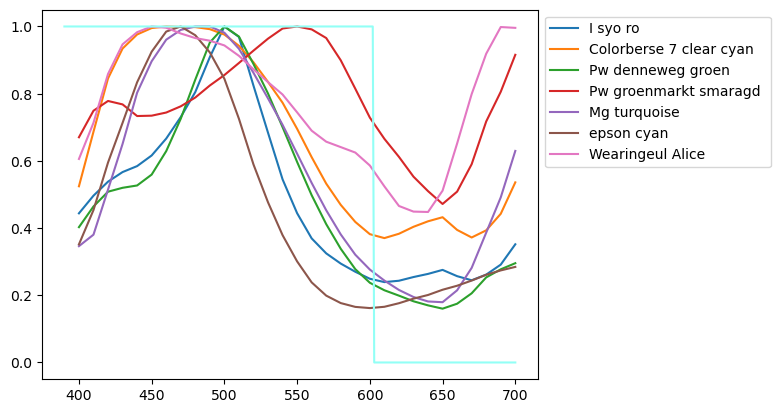

In [102]:
for c in ['I syo ro ','Colorberse 7 clear cyan','Pw denneweg groen ','Pw groenmarkt smaragd ','Mg turquoise','epson cyan', 'Wearingeul Alice']:
    (~all_inks[c]).plot(name=c)
ideal_cyan.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


### best pink

In [83]:
find_closest(ideal_pink)

[(31.950049212750059, 'Cal Bourgogne '),
 (32.809120198450664, 'Bouquet dantan H'),
 (39.046458058782783, 'Fairytale pink'),
 (41.653954252371477, 'Dragon catfish N'),
 (42.099179410722414, 'O cherry blossom'),
 (42.165233634204576, 'F violet blue'),
 (42.926998792965286, 'Platinum Violet2'),
 (43.549556313168353, 'Vd snowy mountain sunset'),
 (44.502615986003143, 'K goshiyama ocher'),
 (45.035051147761642, 'V maskara '),
 (45.824148917600205, 'Robert oster '),
 (45.944477930705105, 'FWP strawberry macaroon'),
 (47.525246238422881, 'Purple jade rabbit'),
 (48.413340901457147, 'F electric pink'),
 (48.704581322735237, 'Pp garden district azelea'),
 (49.029888350316895, 'Think Pink'),
 (49.088071975301254, 'P orgona lilac'),
 (49.088267712479031, 'Di November leaves'),
 (49.959014981711363, 'W Jane eyre'),
 (50.38902619325016, 'Di lavender'),
 (50.698015502212385, 'T foxglove'),
 (51.259535722083029, 'Di early spring'),
 (51.368344954907379, 'R cherry blossom'),
 (51.514469458830213, 'Pw

In [84]:
find_closest(ideal_pink, metric=cosine)

[(0.058608734691337316, 'Cal Bourgogne '),
 (0.063829790925557739, 'Bouquet dantan H'),
 (0.064637044437806712, 'Dragon catfish N'),
 (0.069226329761831407, 'Fairytale pink'),
 (0.071673516765440981, 'R cherry blossom'),
 (0.07771465927862875, 'Purple jade rabbit'),
 (0.078238179605454539, 'Robert oster '),
 (0.079244348332537351, 'W Jane eyre'),
 (0.080156128642296931, 'F electric pink'),
 (0.080223664977934872, 'T foxglove'),
 (0.080575791516375062, 'V maskara '),
 (0.080916195834235261, 'Vd snowy mountain sunset'),
 (0.082046427474523287, 'F violet blue'),
 (0.082227888734806909, 'Cheshire cat'),
 (0.085429834503747415, 'Think Pink'),
 (0.085657371984535935, 'Platinum Violet2'),
 (0.086452795014479, 'K goshiyama ocher'),
 (0.086956356804952395, 'O cherry blossom'),
 (0.087494294349426127, 'Pastel pink'),
 (0.087594499811507465, 'Sailor pink'),
 (0.088730243237448381, 'R cosmic swirl'),
 (0.089640151154181891, 'Hope pink D'),
 (0.090155910966783659, 'FWP strawberry macaroon'),
 (0.09

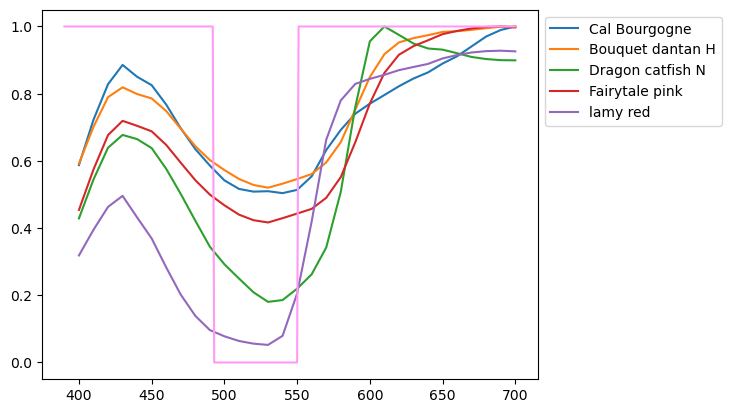

In [95]:
for p in ['Cal Bourgogne ', 'Bouquet dantan H', 'Dragon catfish N', 'Fairytale pink']:
    (~all_inks[p]).plot(name=p)
all_inks["Lamy red"].plot(name="lamy red")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ideal_pink.plot()

### best violet

In [92]:
find_closest(ideal_violet)

[(31.859499490232206, 'O blue iris'),
 (36.249593756066396, 'Platinum Violet2'),
 (38.641648179622734, 'F violet blue'),
 (39.870563195277725, 'Pw hofvijer grijs '),
 (40.074211902632513, 'Di lavender'),
 (41.256259311843834, 'Di manschuria violet'),
 (42.419374018361552, 'Wearingeul Alice'),
 (42.604838242015035, 'Pw laan van niew oost indigo'),
 (43.827137763721979, 'P orgona lilac'),
 (44.166418318894344, 'K kitano pearl silver'),
 (44.321539210457772, 'H Bleu Azur'),
 (44.765586021458141, 'Bouquet dantan H'),
 (45.321715908302309, 'O cherry blossom'),
 (45.437092032705799, 'FWP blue cotton candy'),
 (45.623655609639627, 'Di early spring'),
 (46.287447620673078, 'Cal Bourgogne '),
 (48.274972763819122, 'Pp violet'),
 (51.27713441991537, 'W Jane eyre'),
 (51.669938901520688, 'P balaton kek '),
 (52.793720265708501, 'Fairytale pink'),
 (53.001023964554015, 'FWP Three Steamboats'),
 (53.078970904044297, 'R cosmic swirl'),
 (53.268496169306673, 'Platinum violet'),
 (54.266524607066216, 

In [90]:
find_closest(ideal_violet, metric=cosine)

[(0.063193184487593368, 'O blue iris'),
 (0.066792090728090447, 'Platinum Violet2'),
 (0.070025062290006268, 'Di lavender'),
 (0.070097920633767186, 'F violet blue'),
 (0.073469489269982202, 'Pp violet'),
 (0.076920900658622227, 'Di manschuria violet'),
 (0.077055725832736344, 'W Jane eyre'),
 (0.07865491980352024, 'Pw hofvijer grijs '),
 (0.079689071620167695, 'Pw laan van niew oost indigo'),
 (0.080522570479268807, 'R cosmic swirl'),
 (0.081711978727364465, 'D moon dust'),
 (0.083424488277278885, 'P orgona lilac'),
 (0.084174839671509072, 'Lamy blue'),
 (0.084271913113625696, 'Wearingeul Alice'),
 (0.086369215085143503, 'K kitano pearl silver'),
 (0.088295470415221455, 'Bouquet dantan H'),
 (0.088621900094917549, 'Platinum violet'),
 (0.089207366237787578, 'Cal Bourgogne '),
 (0.08954072873847696, 'H Bleu Azur'),
 (0.089829428420174162, 'P balaton kek '),
 (0.090389136983905494, 'O pebble stone'),
 (0.091697369509266435, 'O cherry blossom'),
 (0.091894605045421573, 'FWP blue cotton c

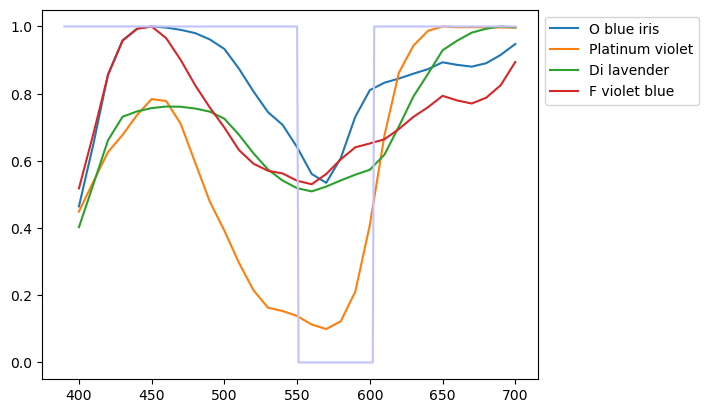

In [104]:
for v in ['O blue iris','Platinum violet', 'Di lavender', 'F violet blue',]:
    (~all_inks[v]).plot(name=v)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ideal_violet.plot()


## Trying 6 ink again

got to time 6 ink gamut to see how effective it will be

In [135]:
selected_inks = ['Lamy crystal beryl',
 'Vd sea shell shimmer',
 'Peach haze D',
 'Orange soleil',
 'Pink gazelle',
 'O pink owl',
 'Pw groenmarkt smaragd ',
 'Rose cyclamen H',
 'Orange D',
 'T sea glass',
 'Lamy red',
 'Pilot blue',
 'CT Pastel Yellow',
 'Mg turquoise',
 'Platinum violet',
 'T foxglove',
 'Di citrus yellow',
 'I tsutsuji ',
 'T milky ocean',
 'V isabela',
 'I fuyu gaki ',
 'epson cyan',
 'Operation overlord orange N']


In [128]:
from itertools import combinations

In [136]:
pairs = list(combinations(selected_inks, 2))

In [127]:
%timeit ink_gamut6.get_pca_size(tetrachromat, stepsize=0.2, verbose=False)

457 ms ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [148]:
top100_selected = [(0.021809324137149422,
  ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.021743380157417558,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T sea glass']),
 (0.0216237397221829,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle']),
 (0.021550898726572065,
  ['Pilot blue', 'Lamy red', 'O pink owl', 'T milky ocean']),
 (0.021534635163180826,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Mg turquoise']),
 (0.021524523379702787,
  ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle']),
 (0.021448872756368309,
  ['Rose cyclamen H', 'Pilot blue', 'T sea glass', 'V isabela']),
 (0.021435248967392628,
  ['Pilot blue', 'Di citrus yellow', 'O pink owl', 'V isabela']),
 (0.021373697511416656,
  ['Pilot blue', 'I tsutsuji ', 'V isabela', 'CT Pastel Yellow']),
 (0.021368285246353258,
  ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow']),
 (0.021335642552370027,
  ['Pilot blue', 'Di citrus yellow', 'Platinum violet', 'V isabela']),
 (0.021322671348392441,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Platinum violet']),
 (0.021318235780195482,
  ['Pilot blue', 'Peach haze D', 'Mg turquoise', 'Pink gazelle']),
 (0.021254499816356853,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'O pink owl']),
 (0.021240425218774228,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'Pink gazelle']),
 (0.021230218182257454,
  ['Pilot blue', 'T sea glass', 'Lamy crystal beryl', 'V isabela']),
 (0.021227678212186685,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'Lamy crystal beryl']),
 (0.021196650060832045,
  ['Pilot blue', 'T foxglove', 'T sea glass', 'Platinum violet']),
 (0.021170667683658551,
  ['Pilot blue', 'Platinum violet', 'V isabela', 'CT Pastel Yellow']),
 (0.021161109886654261,
  ['Pilot blue', 'Lamy red', 'Mg turquoise', 'Lamy crystal beryl']),
 (0.021134343838459857,
  ['Pilot blue', 'Mg turquoise', 'V isabela', 'Pink gazelle']),
 (0.021132104345478075,
  ['Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela', 'Pink gazelle']),
 (0.021096055836887784,
  ['Pilot blue', 'Lamy red', 'I tsutsuji ', 'Mg turquoise']),
 (0.021092022925002396,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'O pink owl']),
 (0.021030492900375897,
  ['Pilot blue', 'T foxglove', 'Lamy crystal beryl', 'Pink gazelle']),
 (0.021016975381839886,
  ['Pilot blue', 'Lamy red', 'Platinum violet', 'Pw groenmarkt smaragd ']),
 (0.020995360289799037,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'V isabela']),
 (0.020994166793718516,
  ['Pilot blue', 'Lamy red', 'T foxglove', 'Platinum violet']),
 (0.020980928809262722,
  ['Lamy red', 'Platinum violet', 'V isabela', 'CT Pastel Yellow']),
 (0.020959987880760755,
  ['Pilot blue', 'Lamy red', 'O pink owl', 'Mg turquoise']),
 (0.02090493116269615,
  ['Pilot blue', 'Lamy red', 'T foxglove', 'I tsutsuji ']),
 (0.020901665682482196,
  ['Pilot blue', 'T foxglove', 'Orange D', 'Lamy crystal beryl']),
 (0.02087297423315071,
  ['Pilot blue', 'T foxglove', 'I tsutsuji ', 'Platinum violet']),
 (0.020865894027955356,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'O pink owl']),
 (0.02086348025915985,
  ['Pilot blue', 'Platinum violet', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020846562638969834,
  ['Rose cyclamen H', 'Pilot blue', 'Di citrus yellow', 'V isabela']),
 (0.020840625266137947,
  ['Pilot blue', 'Di citrus yellow', 'Lamy crystal beryl', 'V isabela']),
 (0.020832098995750059,
  ['Pilot blue', 'O pink owl', 'V isabela', 'CT Pastel Yellow']),
 (0.020824273995192544,
  ['Pilot blue', 'Lamy crystal beryl', 'V isabela', 'CT Pastel Yellow']),
 (0.020787391128264721,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Orange D']),
 (0.020780996406263852,
  ['Pilot blue', 'Peach haze D', 'T sea glass', 'O pink owl']),
 (0.020777176647902518,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T foxglove']),
 (0.020746210222774508,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Platinum violet']),
 (0.020733413432944992,
  ['Pilot blue', 'Di citrus yellow', 'I fuyu gaki ', 'Lamy crystal beryl']),
 (0.020729305897447925,
  ['Lamy red', 'O pink owl', 'T milky ocean', 'Mg turquoise']),
 (0.020727426018447237,
  ['Pilot blue', 'I fuyu gaki ', 'Mg turquoise', 'Pink gazelle']),
 (0.020719652539700595,
  ['Pilot blue', 'T sea glass', 'I fuyu gaki ', 'Lamy crystal beryl']),
 (0.02071618899388139,
  ['Rose cyclamen H',
   'Lamy red',
   'Pw groenmarkt smaragd ',
   'CT Pastel Yellow']),
 (0.020715323918165995,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'Pink gazelle']),
 (0.020705230964076338,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'Lamy crystal beryl']),
 (0.020688957491244664,
  ['Pilot blue', 'Pw groenmarkt smaragd ', 'Lamy crystal beryl', 'V isabela']),
 (0.020683121850218256,
  ['Pilot blue', 'T sea glass', 'I tsutsuji ', 'V isabela']),
 (0.020674772616639414,
  ['Pilot blue', 'Lamy red', 'Lamy crystal beryl', 'CT Pastel Yellow']),
 (0.020666495952353203,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Lamy crystal beryl']),
 (0.020652410066382021,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'I tsutsuji ']),
 (0.020632317477108919,
  ['Pilot blue', 'T foxglove', 'Lamy crystal beryl', 'V isabela']),
 (0.020612972440985811,
  ['Pilot blue', 'Di citrus yellow', 'V isabela', 'Pink gazelle']),
 (0.020612829314482717,
  ['T sea glass', 'Platinum violet', 'T milky ocean', 'V isabela']),
 (0.020609685034291669,
  ['Rose cyclamen H', 'Pilot blue', 'T sea glass', 'I fuyu gaki ']),
 (0.020609426719735924,
  ['Pilot blue', 'T foxglove', 'I fuyu gaki ', 'Pink gazelle']),
 (0.020605983364974434,
  ['Pilot blue', 'T foxglove', 'I tsutsuji ', 'Lamy crystal beryl']),
 (0.020605083316631578,
  ['Pilot blue', 'T sea glass', 'Platinum violet', 'I fuyu gaki ']),
 (0.020599565375137463,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'I fuyu gaki ']),
 (0.020595287028425224,
  ['Pilot blue', 'Lamy red', 'Mg turquoise', 'Pink gazelle']),
 (0.020591946553655593,
  ['Pilot blue', 'O pink owl', 'Pw groenmarkt smaragd ', 'V isabela']),
 (0.020589749125324741,
  ['Pilot blue', 'Lamy red', 'T milky ocean', 'Lamy crystal beryl']),
 (0.020583326493296583,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pw groenmarkt smaragd ']),
 (0.020573385327981697,
  ['Pilot blue', 'V isabela', 'Pink gazelle', 'CT Pastel Yellow']),
 (0.020571982233376862,
  ['Pilot blue', 'T foxglove', 'Peach haze D', 'Platinum violet']),
 (0.020570418636224497,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Peach haze D']),
 (0.020569027288918074,
  ['Pilot blue', 'I tsutsuji ', 'I fuyu gaki ', 'CT Pastel Yellow']),
 (0.020539922872247873,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'I fuyu gaki ']),
 (0.020531564006184777,
  ['Pilot blue', 'Lamy red', 'Platinum violet', 'CT Pastel Yellow']),
 (0.02050485306280081,
  ['Pilot blue', 'Di citrus yellow', 'I tsutsuji ', 'V isabela']),
 (0.020494469797185944,
  ['Lamy red', 'T foxglove', 'Platinum violet', 'T milky ocean']),
 (0.020474731316385442,
  ['Pilot blue', 'I tsutsuji ', 'Mg turquoise', 'V isabela']),
 (0.020474722125517264,
  ['Pilot blue', 'T sea glass', 'V isabela', 'Pink gazelle']),
 (0.02047314246452403,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Mg turquoise']),
 (0.020470848320320978,
  ['Pilot blue', 'T foxglove', 'Pw groenmarkt smaragd ', 'Pink gazelle']),
 (0.020468447400479262,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'V isabela']),
 (0.020461180665355405,
  ['Pilot blue', 'Lamy red', 'I tsutsuji ', 'T milky ocean']),
 (0.020457782928136825,
  ['Pilot blue', 'T foxglove', 'Platinum violet', 'Pw groenmarkt smaragd ']),
 (0.020455419796209795,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'T milky ocean']),
 (0.020454504969576626,
  ['Pilot blue', 'I fuyu gaki ', 'O pink owl', 'Mg turquoise']),
 (0.020450510076137629,
  ['Pilot blue', 'T foxglove', 'Orange D', 'O pink owl']),
 (0.020446199394529463,
  ['Pilot blue', 'T foxglove', 'V isabela', 'Pink gazelle']),
 (0.020445760079197572,
  ['Pilot blue', 'T foxglove', 'Orange soleil', 'Platinum violet']),
 (0.020437988969111753,
  ['Pilot blue', 'T foxglove', 'T milky ocean', 'Lamy crystal beryl']),
 (0.020436157613282713,
  ['Pilot blue', 'I tsutsuji ', 'Orange D', 'Mg turquoise']),
 (0.020421784952309896,
  ['Pilot blue', 'Lamy red', 'T sea glass', 'Pink gazelle']),
 (0.020417862028889733,
  ['Rose cyclamen H', 'Pilot blue', 'Peach haze D', 'Mg turquoise']),
 (0.020414865795451265,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'CT Pastel Yellow']),
 (0.020414182537293102,
  ['Pilot blue', 'Vd sea shell shimmer', 'T sea glass', 'Lamy crystal beryl']),
 (0.020407543501296477,
  ['Pilot blue', 'Orange soleil', 'I tsutsuji ', 'V isabela']),
 (0.020398939063492716,
  ['Rose cyclamen H', 'Pilot blue', 'T foxglove', 'Pw groenmarkt smaragd ']),
 (0.020398780495902658,
  ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T milky ocean']),
 (0.020391478461657231,
  ['Rose cyclamen H', 'Pilot blue', 'I fuyu gaki ', 'Mg turquoise']),
 (0.020389990943035174,
  ['T sea glass', 'Mg turquoise', 'Pink gazelle', 'CT Pastel Yellow']),
 (0.020385868669186569,
  ['Pilot blue',
   'Di citrus yellow',
   'I fuyu gaki ',
   'Pw groenmarkt smaragd ']),
 (0.020379615945487428,

  ['T foxglove', 'Orange soleil', 'Platinum violet', 'CT Pastel Yellow'])]

In [141]:
import time

In [157]:
top6_scores = []
for s, top4 in tqdm(top100_selected[:10], desc="looping through 6 ink combos", total=10):
    for pair in tqdm(pairs):
        top6 = top4 + list(pair)
        ink_gamut6 = InkGamut([all_inks[n] for n in top6], paper, d65)
        w = ink_gamut6.get_pca_size(tetrachromat, stepsize=0.2)
        top6_scores.append((w, top6))
    top6_scores.sort(reverse=True)
    print("Top 3 so far:\n", top6_scores[:3])

looping through 6 ink combos:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.00095704848672201594, ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela', 'Lamy red', 'CT Pastel Yellow']), (0.00086624462229980886, ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela', 'Peach haze D', 'CT Pastel Yellow']), (0.00084494983673127726, ['Rose cyclamen H', 'Pilot blue', 'Pw groenmarkt smaragd ', 'V isabela', 'Peach haze D', 'Di citrus yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0010567305794799804, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T sea glass', 'Lamy red', 'CT Pastel Yellow']), (0.0010500675361525284, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T sea glass', 'Peach haze D', 'CT Pastel Yellow']), (0.0010324539327589588, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'T sea glass', 'CT Pastel Yellow', 'Platinum violet'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011337938943652619, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Orange D', 'CT Pastel Yellow']), (0.0011282223825674353, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011337938943652619, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Orange D', 'CT Pastel Yellow']), (0.0011282223825674353, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011337938943652619, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Orange D', 'CT Pastel Yellow']), (0.0011282223825674353, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011644770007970037, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011546701894112076, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011644770007970037, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011546701894112076, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011644770007970037, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011546701894112076, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011644770007970037, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011546701894112076, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


  0%|          | 0/253 [00:00<?, ?it/s]

Top 3 so far:
 [(0.0011861009990101674, ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011644770007970037, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']), (0.0011546701894112076, ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow'])]


In [167]:
top6_scores

[(0.0011861009990101674,
  ['Rose cyclamen H',
   'Pilot blue',
   'Lamy red',
   'Pink gazelle',
   'Peach haze D',
   'CT Pastel Yellow']),
 (0.0011644770007970037,
  ['Lamy red',
   'Platinum violet',
   'Mg turquoise',
   'Pink gazelle',
   'Peach haze D',
   'CT Pastel Yellow']),
 (0.0011546701894112076,
  ['Lamy red',
   'Platinum violet',
   'Mg turquoise',
   'Pink gazelle',
   'Lamy red',
   'CT Pastel Yellow']),
 (0.0011337938943652619,
  ['Rose cyclamen H',
   'Pilot blue',
   'Lamy red',
   'Pink gazelle',
   'Orange D',
   'CT Pastel Yellow']),
 (0.0011320098479139162,
  ['Rose cyclamen H',
   'Pilot blue',
   'V isabela',
   'CT Pastel Yellow',
   'Lamy red',
   'CT Pastel Yellow']),
 (0.0011282223825674353,
  ['Rose cyclamen H',
   'Pilot blue',
   'Lamy red',
   'Pink gazelle',
   'Lamy red',
   'CT Pastel Yellow']),
 (0.0011245789827011869,
  ['Rose cyclamen H',
   'Pilot blue',
   'V isabela',
   'CT Pastel Yellow',
   'Lamy red',
   'Platinum violet']),
 (0.001114936

In [159]:
for s, inks6 in top6_scores[:10]:
    ink_gamut6 = InkGamut([all_inks[n] for n in inks6], paper, d65)
    w = ink_gamut6.get_width(tetrachromat, stepsize=0.1, verbose=False)
    print(w, "\t", inks6)

0.0205435134406 	 ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']
0.0201295723428 	 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']
0.019663269739 	 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow']
0.0207692203446 	 ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Orange D', 'CT Pastel Yellow']
0.0215519525274 	 ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow', 'Lamy red', 'CT Pastel Yellow']
0.020132488109 	 ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Lamy red', 'CT Pastel Yellow']
0.0216430400184 	 ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow', 'Lamy red', 'Platinum violet']
0.0200774913935 	 ['Rose cyclamen H', 'Pilot blue', 'Lamy red', 'Pink gazelle', 'Peach haze D', 'Di citrus yellow']
0.0209914245843 	 ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yello

In [189]:
def get_width(ink_set, ss=0.1):
    ink_gamut6 = InkGamut([all_inks[n] for n in ink_set], paper, d65)
    w = ink_gamut6.get_width(tetrachromat, stepsize=ss, verbose=True)
    return w

In [180]:
get_width(['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow', 'Lamy red'])

Generating point cloud: 2it [00:00,  4.10it/s]                                                 


Point cloud generated.
maximum distance is 0.019743238445982025 with percentages (0.40000000000000002, 0.80000000000000004, 0.30000000000000004, 0.5, 0.10000000000000001) and (0.0, 0.90000000000000002, 0.80000000000000004, 0.30000000000000004, 0.20000000000000001)


0.019743238445982025

In [190]:
get_width(['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow', 'Lamy red'], ss=0.05)

Generating point cloud: 41it [00:11,  3.50it/s]                                                


Point cloud generated.
maximum distance is 0.021533217001126814 with percentages (0.5, 0.85000000000000009, 0.45000000000000001, 0.55000000000000004, 0.0) and (0.0, 0.85000000000000009, 0.85000000000000009, 0.20000000000000001, 0.15000000000000002)


0.021533217001126814

In [191]:
get_width([ 'epson cyan',
            'Operation overlord orange N','CT Pastel Yellow',
            'Platinum violet',
         'Peach haze D',
          ], ss=0.05)

Generating point cloud: 41it [00:10,  3.76it/s]                                                


Point cloud generated.
maximum distance is 0.021093187508222144 with percentages (1.0, 0.90000000000000002, 0.0, 0.55000000000000004, 0.0) and (0.80000000000000004, 0.0, 0.25, 0.0, 0.55000000000000004)


0.021093187508222144

In [ ]:
all_inks["Lamy red"]

In [195]:
get_width([ 'epson cyan',
           'Operation overlord orange N',
           'Platinum violet',
            'CT Pastel Yellow',
            'Lamy red',
         'Peach haze D',
          ], ss=0.05)

Generating point cloud:   1%|▎                                 | 8/857 [00:04<08:30,  1.66it/s]


KeyboardInterrupt: 

In [165]:
for s, n in top6_scores:
    if 'Peach haze D' in n and 'Platinum violet' in n:
        print(s, n)

0.0011644770008 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']
0.00109893144899 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'Di citrus yellow']
0.000945951946049 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'Operation overlord orange N']
0.000924551312416 ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow', 'Peach haze D', 'Platinum violet']
0.000898985678534 ['Pilot blue', 'I tsutsuji ', 'V isabela', 'CT Pastel Yellow', 'Peach haze D', 'Platinum violet']
0.000873166853995 ['Pilot blue', 'Di citrus yellow', 'O pink owl', 'V isabela', 'Peach haze D', 'Platinum violet']
0.000805828354458 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'Pilot blue']
0.000787215417356 ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Vd sea shell shimmer', 'Peach haze D']
0.000774886883772 ['Lamy red', 'Platinum violet', 'Mg

In [197]:
get_width(['Lamy red', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow'], ss=0.05)

Generating point cloud: 41it [00:12,  3.39it/s]                                                


Point cloud generated.
maximum distance is 0.019811457544840982 with percentages (0.050000000000000003, 0.0, 1.0, 0.0, 0.55000000000000004) and (0.15000000000000002, 0.5, 0.30000000000000004, 1.0, 0.050000000000000003)


0.019811457544840982

In [198]:
get_width(['Pilot blue', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow'], ss=0.05)

Generating point cloud: 41it [00:11,  3.56it/s]                                                


Point cloud generated.
maximum distance is 0.022112402824622235 with percentages (0.70000000000000007, 0.60000000000000009, 0.90000000000000002, 0.0, 0.25) and (0.90000000000000002, 0.90000000000000002, 0.0, 1.0, 0.0)


0.022112402824622235

In [213]:
get_width(['epson cyan', 'Platinum violet', 'Operation overlord orange N', 'Peach haze D',], ss=0.05)

Generating point cloud: 2it [00:00,  4.02it/s]                                                 


Point cloud generated.
maximum distance is 0.02040129533604612 with percentages (0.80000000000000004, 0.35000000000000003, 0.55000000000000004, 0.15000000000000002) and (0.70000000000000007, 0.0, 0.25, 0.40000000000000002)


0.020401295336046121

In [200]:
get_width(['Pilot blue', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow'], ss=0.05)

Generating point cloud: 2it [00:00,  4.67it/s]                                                 


Point cloud generated.
maximum distance is 0.019922734352497196 with percentages (0.95000000000000007, 0.60000000000000009, 0.050000000000000003, 0.65000000000000002) and (0.85000000000000009, 0.050000000000000003, 0.40000000000000002, 0.55000000000000004)


0.019922734352497196

In [201]:
get_width(['Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow'], ss=0.05)

Generating point cloud: 2it [00:00,  4.46it/s]                                                 


Point cloud generated.
maximum distance is 0.019622623240427184 with percentages (0.60000000000000009, 0.25, 0.0, 1.0) and (0.55000000000000004, 0.15000000000000002, 0.050000000000000003, 0.95000000000000007)


0.019622623240427184

In [202]:
get_width(['Pilot blue', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow', 'V isabela'], ss=0.05)

Generating point cloud: 41it [00:11,  3.72it/s]                                                


Point cloud generated.
maximum distance is 0.021018596664582 with percentages (0.70000000000000007, 0.40000000000000002, 0.10000000000000001, 0.25, 0.15000000000000002) and (0.90000000000000002, 0.050000000000000003, 0.050000000000000003, 0.20000000000000001, 0.95000000000000007)


0.021018596664582001

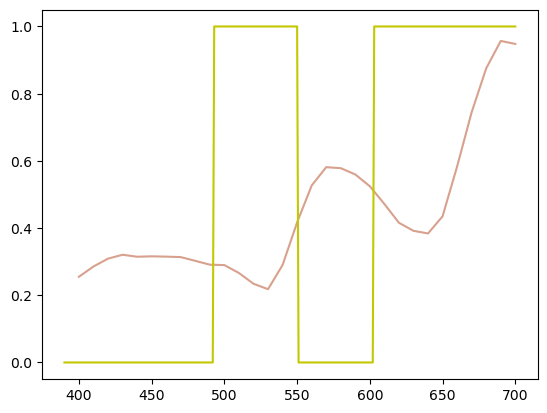

In [212]:
all_inks['V isabela'].plot()
# (ideal_pink * ideal_cyan).plot()
(ideal_violet * ideal_yellow).plot()

In [203]:
get_width(['Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow', 'V isabela'], ss=0.05)

Generating point cloud: 41it [00:10,  3.77it/s]                                                


Point cloud generated.
maximum distance is 0.020314505880645983 with percentages (0.60000000000000009, 0.25, 0.0, 1.0, 0.0) and (0.55000000000000004, 0.050000000000000003, 0.050000000000000003, 0.95000000000000007, 0.20000000000000001)


0.020314505880645983

In [ ]:
get_width(['Pilot blue', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow'], ss=0.05)

In [ ]:
get_width(['Lamy red', 'Pilot blue', 'Pink gazelle', 'CT Pastel Yellow'], ss=0.05)

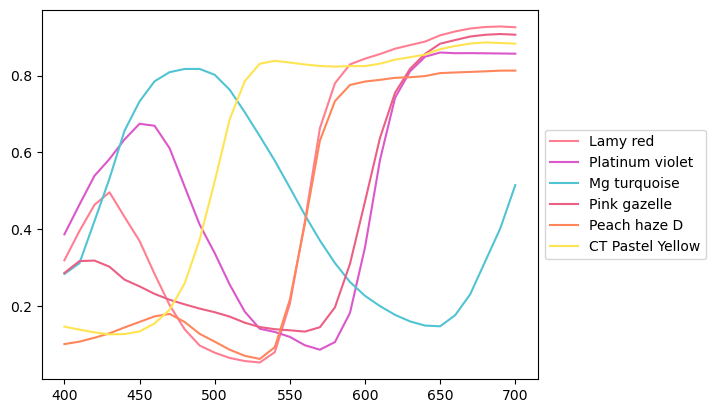

In [166]:
for n in ['Lamy red', 'Platinum violet', 'Mg turquoise', 'Pink gazelle', 'Peach haze D', 'CT Pastel Yellow']:
    c = all_inks[n]
    c.plot(name=n, color=c.to_rgb())
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


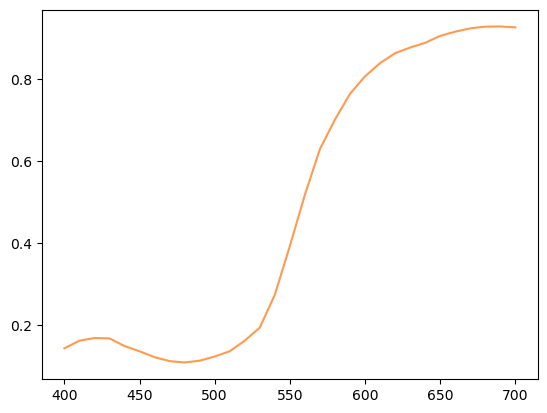

In [172]:
all_inks['Vd sea shell shimmer'].plot()

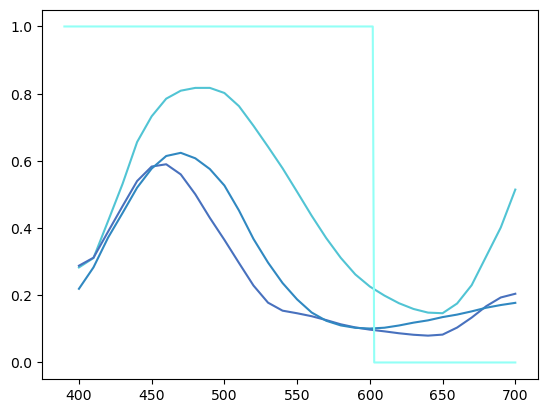

In [171]:
all_inks["Mg turquoise"].plot()
all_inks["Pilot blue"].plot()
ideal_cyan.plot()

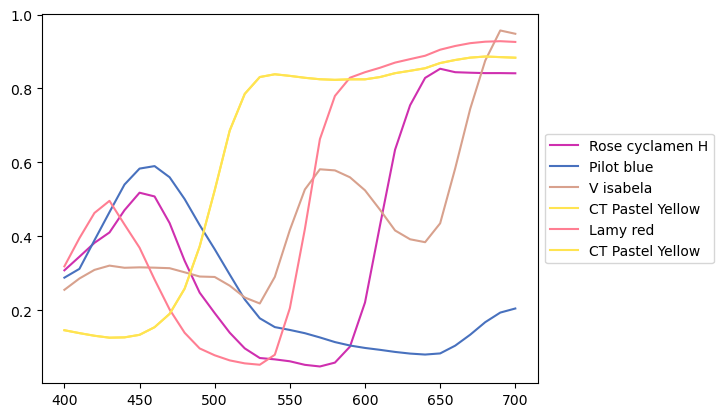

In [162]:
for n in ['Rose cyclamen H', 'Pilot blue', 'V isabela', 'CT Pastel Yellow', 'Lamy red', 'CT Pastel Yellow']:
    c = all_inks[n]
    c.plot(name=n, color=c.to_rgb())
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [18]:
ideal_yellow.wavelengths

array([390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
       429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
       442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
       455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
       468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480,
       481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493,
       494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506,
       507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519,
       520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
       546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558,
       559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 57

In [19]:
Observer.trichromat().get_sensor_matrix(wavelengths10).shape

(3, 31)

In [20]:
tetrachromat = Observer.tetrachromat()

In [21]:
tetrachromat.get_sensor_matrix(wavelengths10).shape

(4, 31)

In [22]:
ideal_gamut = InkGamut([ideal_cyan, ideal_pink, ideal_violet, ideal_yellow], paper=paper.interpolate_values(wavelengths1))

0.042 with L neitz

In [23]:
ideal_gamut.get_width(tetrachromat, stepsize=0.05)

Generating point cloud: 2it [00:01,  1.61it/s]                                                 


Point cloud generated.
maximum distance is 0.050847210366745 with percentages (0.0, 0.0, 0.85000000000000009, 0.0) and (1.0, 0.95000000000000007, 0.0, 0.0)


0.050847210366744999

0.0508 with stockman neitz. ok. 

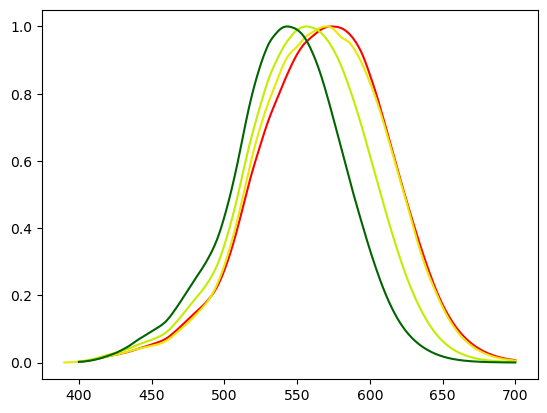

In [24]:
# Cone.m_cone().plot()
Cone.l_cone(template="neitz").plot(color='red')
Cone.l_cone().plot()

Cone.q_cone().plot()

Cone.m_cone(template="neitz").plot(color='darkgreen')


# Cone.m_cone(template="neitz",od=0.35).plot(color='orange')
# Cone.m_cone(template="neitz",od=0.5).plot(color='black')